In [151]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

warnings.filterwarnings('ignore')

In [152]:
df = pd.read_csv('data_per_ipcode/combined_data.csv')

In [153]:
df

Unnamed: 0  ddc_barcode ddc_ipcode ddc_mch_code ddc_mch_side  \
0            438841   9438900549      -----         C307            R   
1            438853   9438900549      -----         C307            R   
2            438854   9438900549      -----         C307            R   
3            438892   9438900549      -----         C307            R   
4            438893   9438900549      -----         C307            R   
...             ...          ...        ...          ...          ...   
4072065      437975   9437966860      42982         1504            R   
4072066      437976   9437966860      42982         1504            R   
4072067      438018   9437966860      42982         1504            R   
4072068      438019   9437966860      42982         1504            R   
4072069      438036   9437966860      42982         1504            R   

                      ddc_ev_subcode     ddc_ev_timestamp  c_machine  month  \
0           LO_LOADER_IN_PRESS_START  2022-10-14 20:49:24       True     10   
1        LO_BLADDER_PRESHAPING_START  2022-10-14 20:49:26       True     10   
2            LO_LOADER_IN_PRESS_STOP  2022-10-14 20:49:26       True     10   
3            LO_BLADDER_VACUUM_START  2022-10-14 20:49:34       True     10   
4         LO_BLADDER_PRESHAPING_STOP  2022-10-14 20:49:34       True     10   
...                              ...                  ...        ...    ...   
4072065         UN_UNLOADER_UP_START  2022-10-14 20:46:01      False     10   
4072066       UN_TCR_UP_NO_SUV_START  2022-10-14 20:46:01      False     10   
4072067          UN_UNLOADER_UP_STOP  2022-10-14 20:46:10      False     10   
4072068        UN_UNLOADER_OUT_START  2022-10-14 20:46:10      False     10   
4072069         UN_UNLOADER_OUT_STOP  2022-10-14 20:46:13      False     10   

          y-m-day  
0        22-10-14  
1        22-10-14  
2        22-10-14  
3        22-10-14  
4        22-10-14  
...           ...  
4072065  22-10-14  
4072066  22-10-14  
4072067  22-10-14  
4072068  22-10-14  
4072069  22-10-14  

[4072070 rows x 10 columns]

# Calculated the Elapsed Time of each Tyre

In [154]:

# Convert 'ddc_ev_timestamp' to datetime format
df['ddc_ev_timestamp'] = pd.to_datetime(df['ddc_ev_timestamp'])

# Group by 'ddc_barcode'
grouped_data = df.groupby('ddc_barcode')

# Initialize an empty list to store the calculated times
times = []

# Iterate through each group
for name, group in grouped_data:
    # Find the maximum timestamp in each group
    max_timestamp = group['ddc_ev_timestamp'].max()
    
    # Find the minimum timestamp for 'LO_LOADER_IN_PRESS_START', or use the first event if it doesn't exist
    min_timestamp = group.loc[group['ddc_ev_subcode'] == 'LO_LOADER_IN_PRESS_START', 'ddc_ev_timestamp'].min()
    if pd.isnull(min_timestamp):
        min_timestamp = group['ddc_ev_timestamp'].min()
    
    # Get the first and last 'ddc_ev_subcode'
    first_subcode = group['ddc_ev_subcode'].iloc[0]
    last_subcode = group['ddc_ev_subcode'].iloc[-1]
    
    # Calculate the time elapsed
    elapsed_time = max_timestamp - min_timestamp
    
    # Get the 'ddc_ipcode' and 'ddc_mch_code' and 'ddc_mch_side' for the first row in the group
    ipcode = group['ddc_ipcode'].iloc[0]
    mch_code = str(group['ddc_mch_code'].iloc[0])  # Convert to string
    mch_side = str(group['ddc_mch_side'].iloc[0])  # Convert to string
    
    # Append the result to the list
    times.append({'ddc_barcode': name, 'ddc_ipcode': ipcode, 'ddc_mch_code': mch_code, 'ddc_mch_side': mch_side,
                  'first_subcode': first_subcode, 'last_subcode': last_subcode,
                  'elapsed_time': elapsed_time, 'y-m-d-hour': max_timestamp.strftime('%Y-%m-%d %H:%M:%S')})

# Create a new DataFrame from the list
result_df = pd.DataFrame(times)

# Sort the DataFrame by 'elapsed_time'
result_df = result_df.sort_values(by='elapsed_time')

result_df['elapsed_time_min'] = result_df['elapsed_time'].dt.total_seconds() / 60

# Display the result
print(result_df)


       ddc_barcode ddc_ipcode ddc_mch_code ddc_mch_side  \
12129   9439866282      39518         C308            L   
15701   9439937957      42096         C408            L   
12272   9439876660      42438         C411            R   
12134   9439866479      39518         C209            L   
12135   9439866492      39518         C308            R   
...            ...        ...          ...          ...   
32298   9440192006      38820         C503            R   
55631   9440369814      31495         C505            L   
55630   9440369813      31495         C505            R   
26204   9440104553      23730         C308            L   
26203   9440104552      23730         C308            R   

                      first_subcode                  last_subcode  \
12129               UN_VACUUM_START               UN_VACUUM_START   
15701             UN_FORK_OUT_START             UN_FORK_OUT_START   
12272  OP_PRESS_MOVEMENT_UP_1_START  OP_PRESS_MOVEMENT_UP_1_START   
12134          

In [155]:
# Remove rows with elapsed time over 1 day
result_df = result_df[result_df['elapsed_time'] <= pd.Timedelta(days=1)]

# Display the updated DataFrame
print(result_df)

       ddc_barcode ddc_ipcode ddc_mch_code ddc_mch_side  \
12129   9439866282      39518         C308            L   
15701   9439937957      42096         C408            L   
12272   9439876660      42438         C411            R   
12134   9439866479      39518         C209            L   
12135   9439866492      39518         C308            R   
...            ...        ...          ...          ...   
28359   9440139375      38823         C204            R   
16724   9439940986      25720         C609            R   
16725   9439940987      25720         C609            L   
16611   9439940555      25720         C609            R   
16612   9439940556      25720         C609            L   

                      first_subcode                  last_subcode  \
12129               UN_VACUUM_START               UN_VACUUM_START   
15701             UN_FORK_OUT_START             UN_FORK_OUT_START   
12272  OP_PRESS_MOVEMENT_UP_1_START  OP_PRESS_MOVEMENT_UP_1_START   
12134          

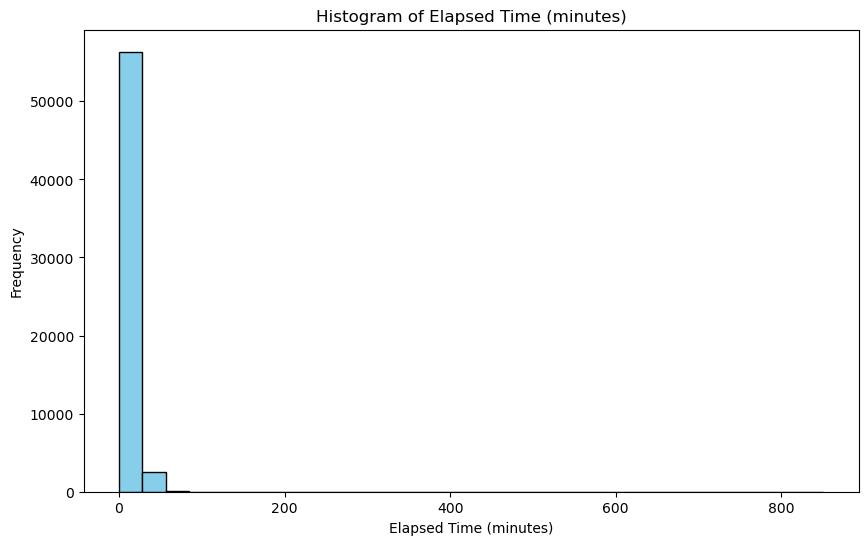

In [156]:
elapsed_time_min = result_df['elapsed_time_min']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(elapsed_time_min, bins=30, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Histogram of Elapsed Time (minutes)')
plt.xlabel('Elapsed Time (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# Split the data into 15 days Group

In [157]:
# Convert 'y-m-d-hour' to datetime format
result_df['y-m-d-hour'] = pd.to_datetime(result_df['y-m-d-hour'])

# Create a new column for the 15-day groups
result_df['15_day_group'] = (result_df['y-m-d-hour'] - result_df['y-m-d-hour'].min()) // timedelta(days=15)

# Display the result
print(result_df)

       ddc_barcode ddc_ipcode ddc_mch_code ddc_mch_side  \
12129   9439866282      39518         C308            L   
15701   9439937957      42096         C408            L   
12272   9439876660      42438         C411            R   
12134   9439866479      39518         C209            L   
12135   9439866492      39518         C308            R   
...            ...        ...          ...          ...   
28359   9440139375      38823         C204            R   
16724   9439940986      25720         C609            R   
16725   9439940987      25720         C609            L   
16611   9439940555      25720         C609            R   
16612   9439940556      25720         C609            L   

                      first_subcode                  last_subcode  \
12129               UN_VACUUM_START               UN_VACUUM_START   
15701             UN_FORK_OUT_START             UN_FORK_OUT_START   
12272  OP_PRESS_MOVEMENT_UP_1_START  OP_PRESS_MOVEMENT_UP_1_START   
12134          

In [158]:
group_counts = result_df['15_day_group'].value_counts()

# Display the result
print(group_counts)

4    29556
0     8122
1     7310
2     7076
3     6865
Name: 15_day_group, dtype: int64


# Plot each 15 Days Group seperately with Outliers

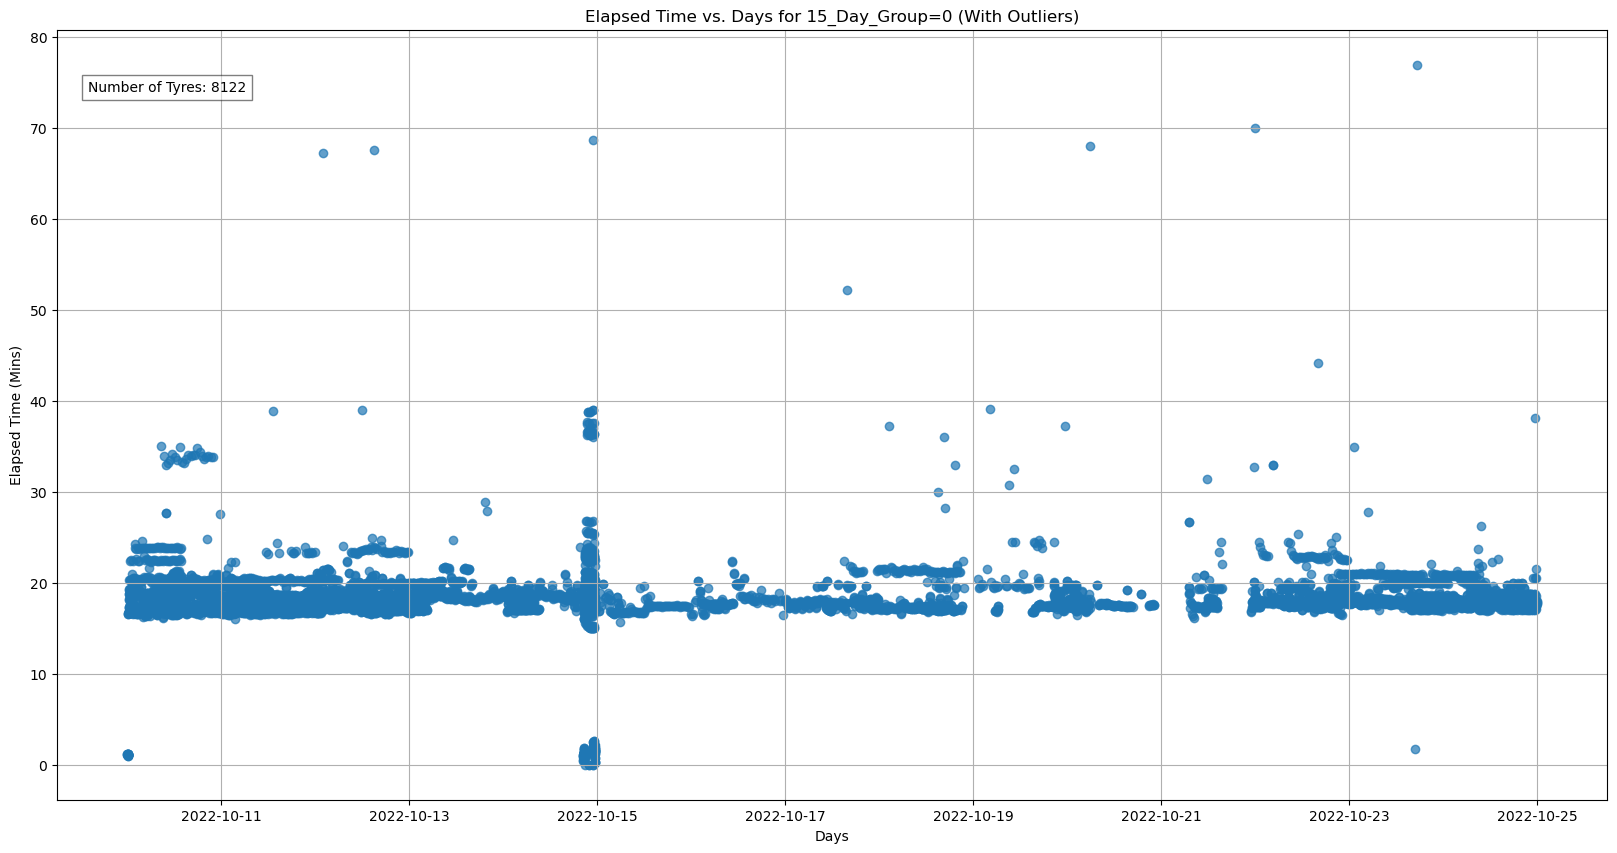

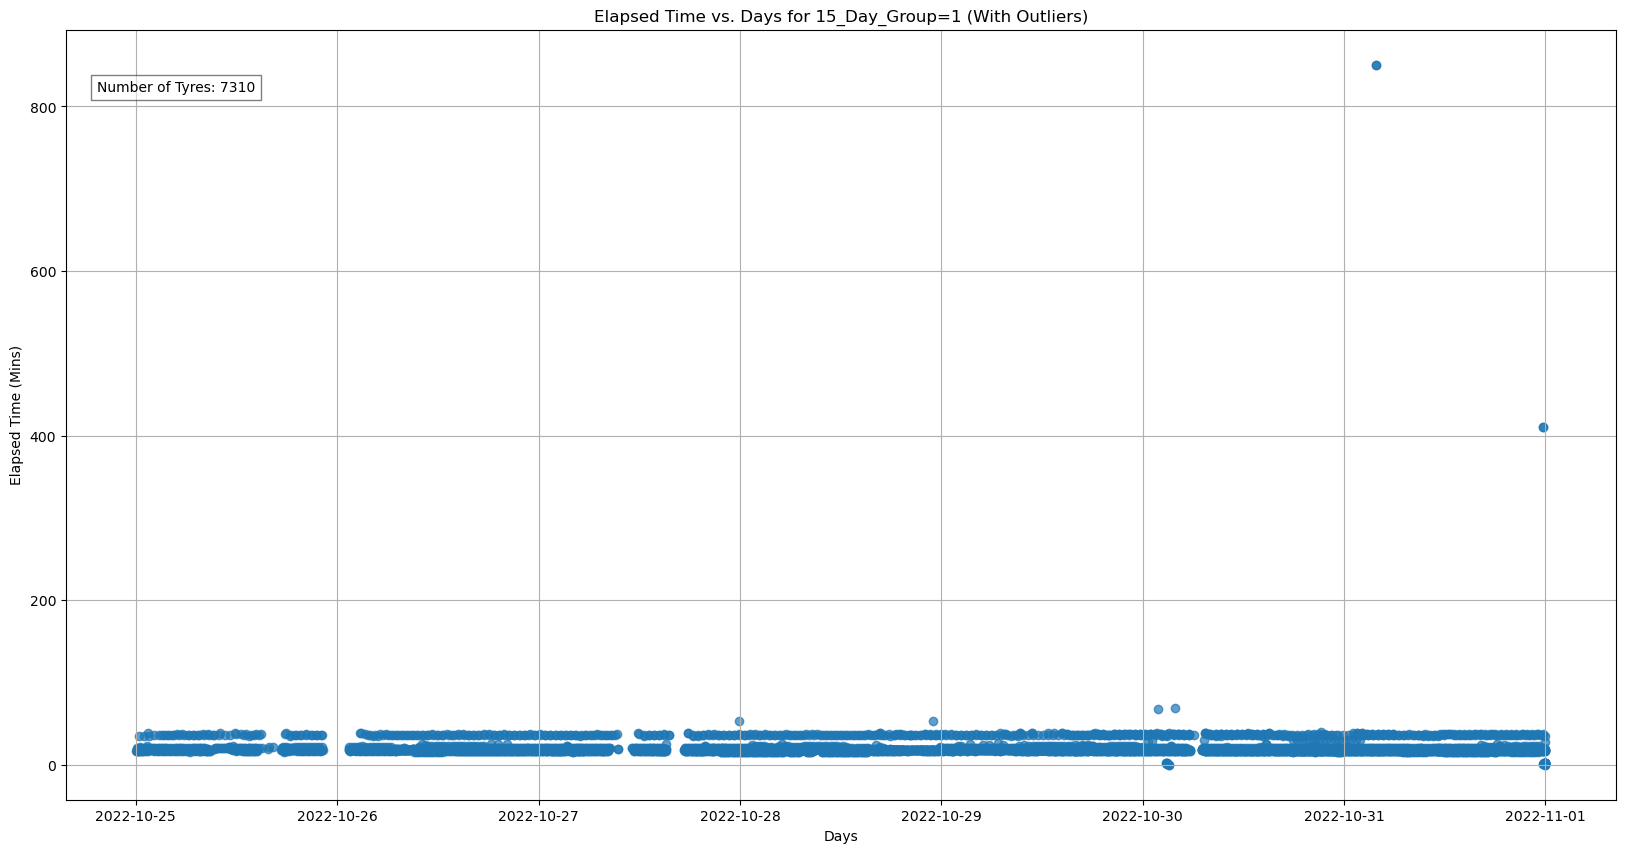

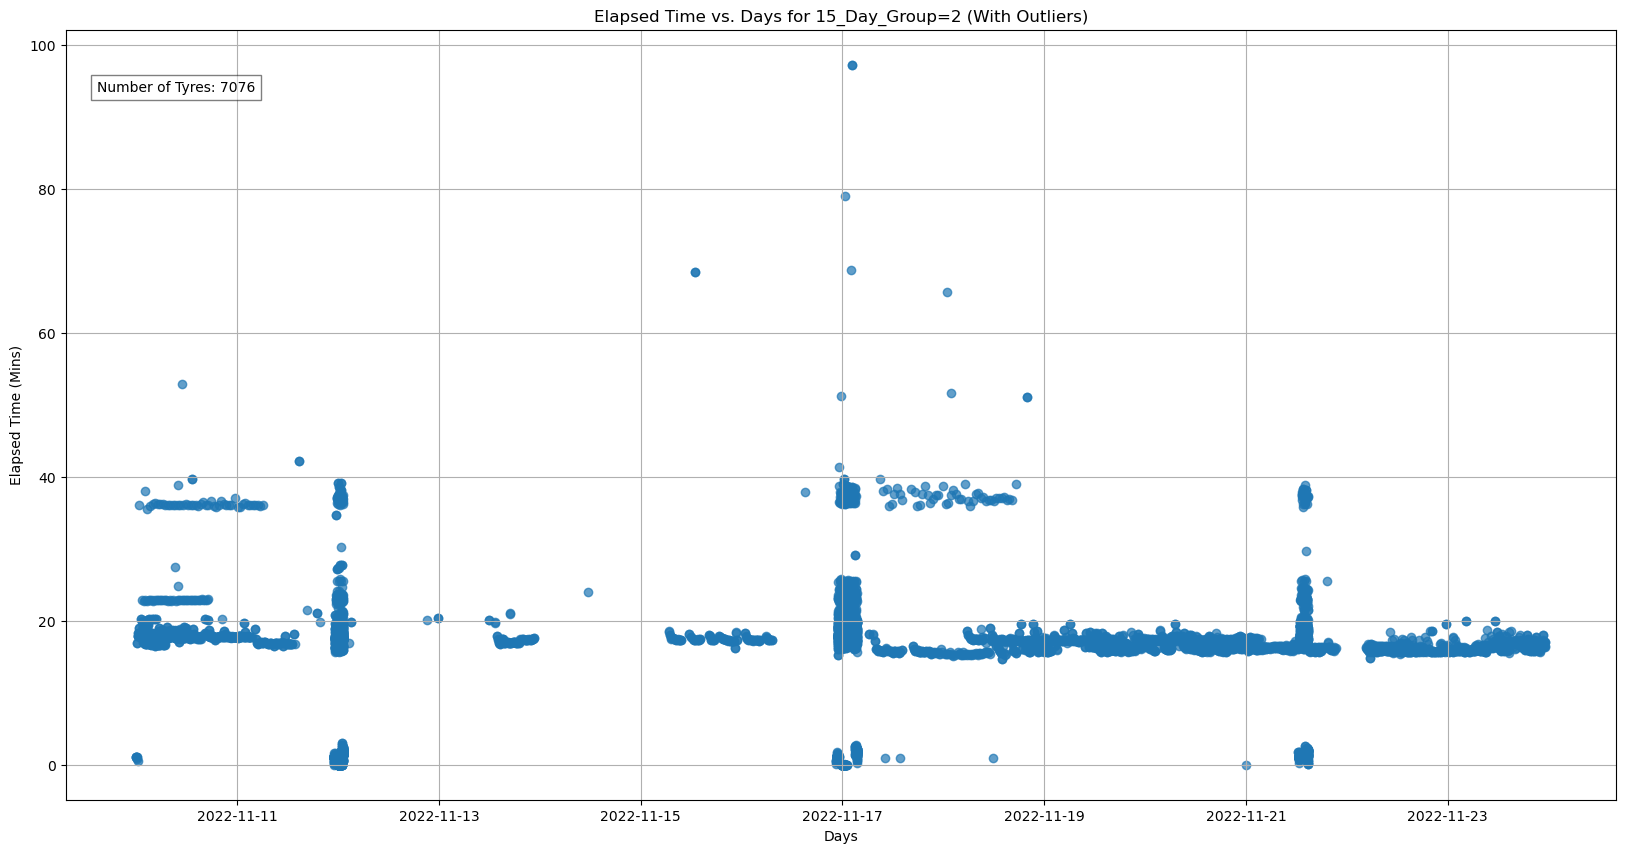

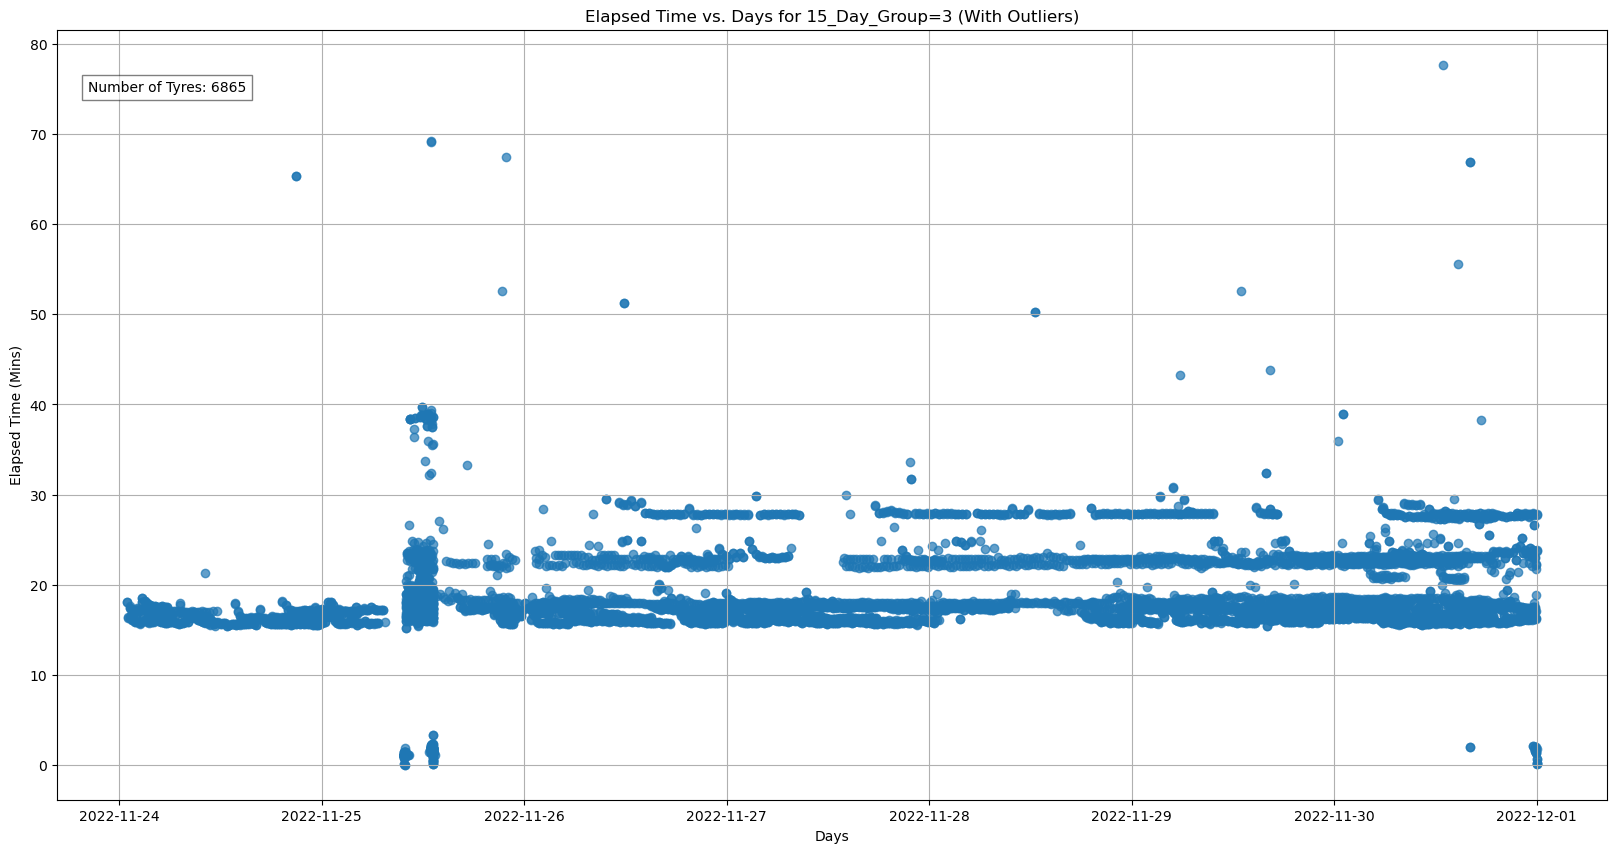

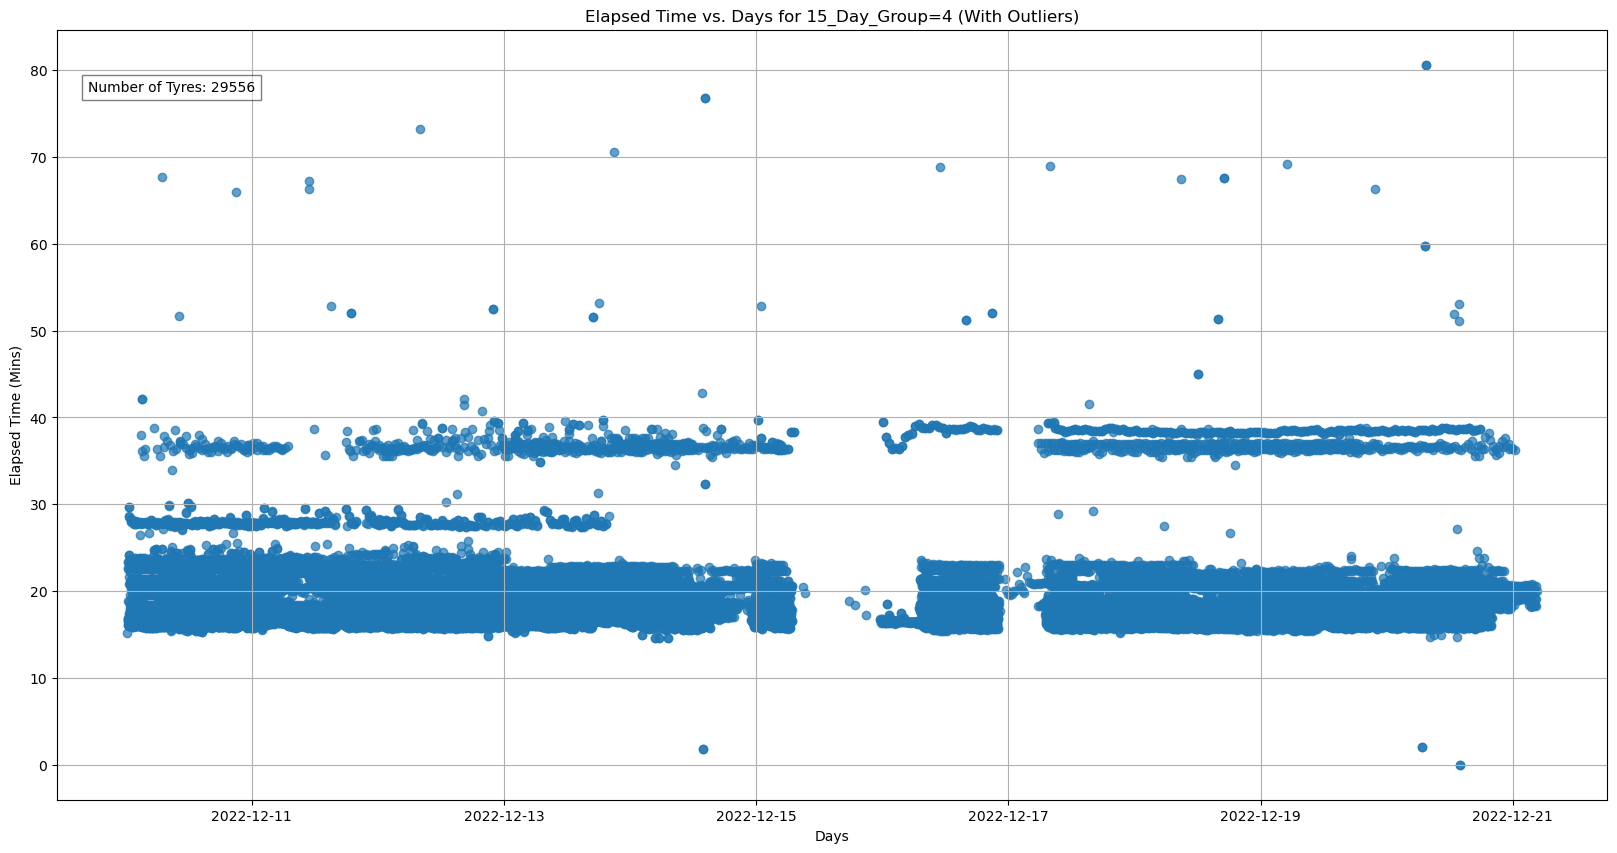

In [159]:
# Plotting for each 15-day group separately without removing outliers
for group_name, group_data in result_df.groupby('15_day_group'):
    plt.figure(figsize=(20, 10))
    
    # Plotting
    plt.scatter(group_data['y-m-d-hour'], group_data['elapsed_time_min'], alpha=0.7)
    
    # Title and labels
    plt.title(f'Elapsed Time vs. Days for 15_Day_Group={group_name} (With Outliers)')
    plt.xlabel('Days')
    plt.ylabel('Elapsed Time (Mins)')
    plt.grid(True)
    
    # Display the number of points in the current plot
    num_points = len(group_data)
    plt.text(0.02, 0.92, f'Number of Tyres: {num_points}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    
    plt.show()


# Plot each 15 Days Group seperately without Outliers

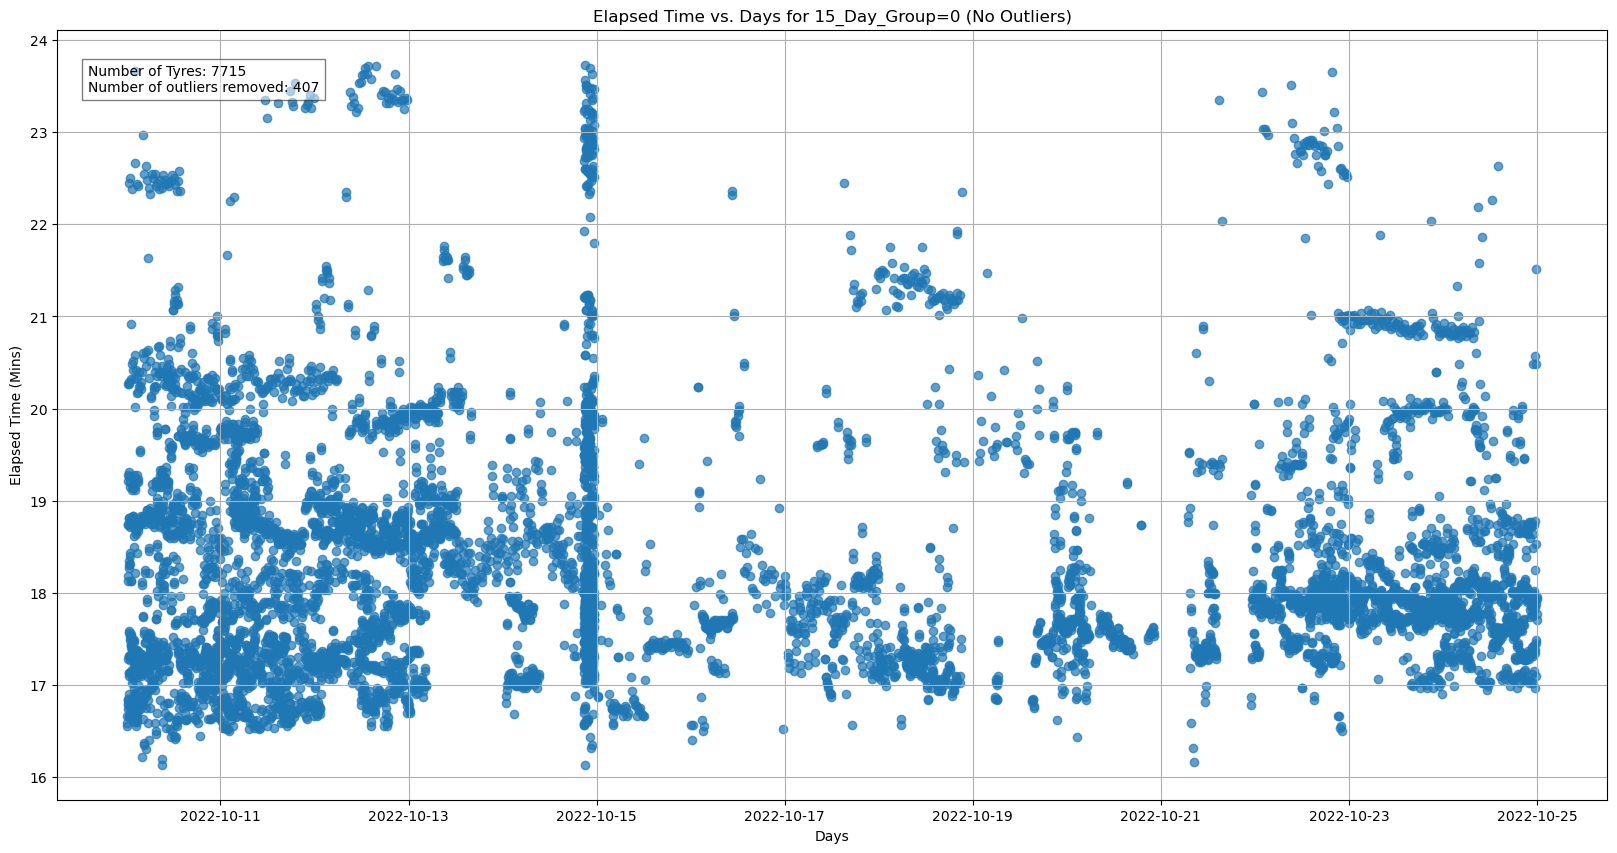

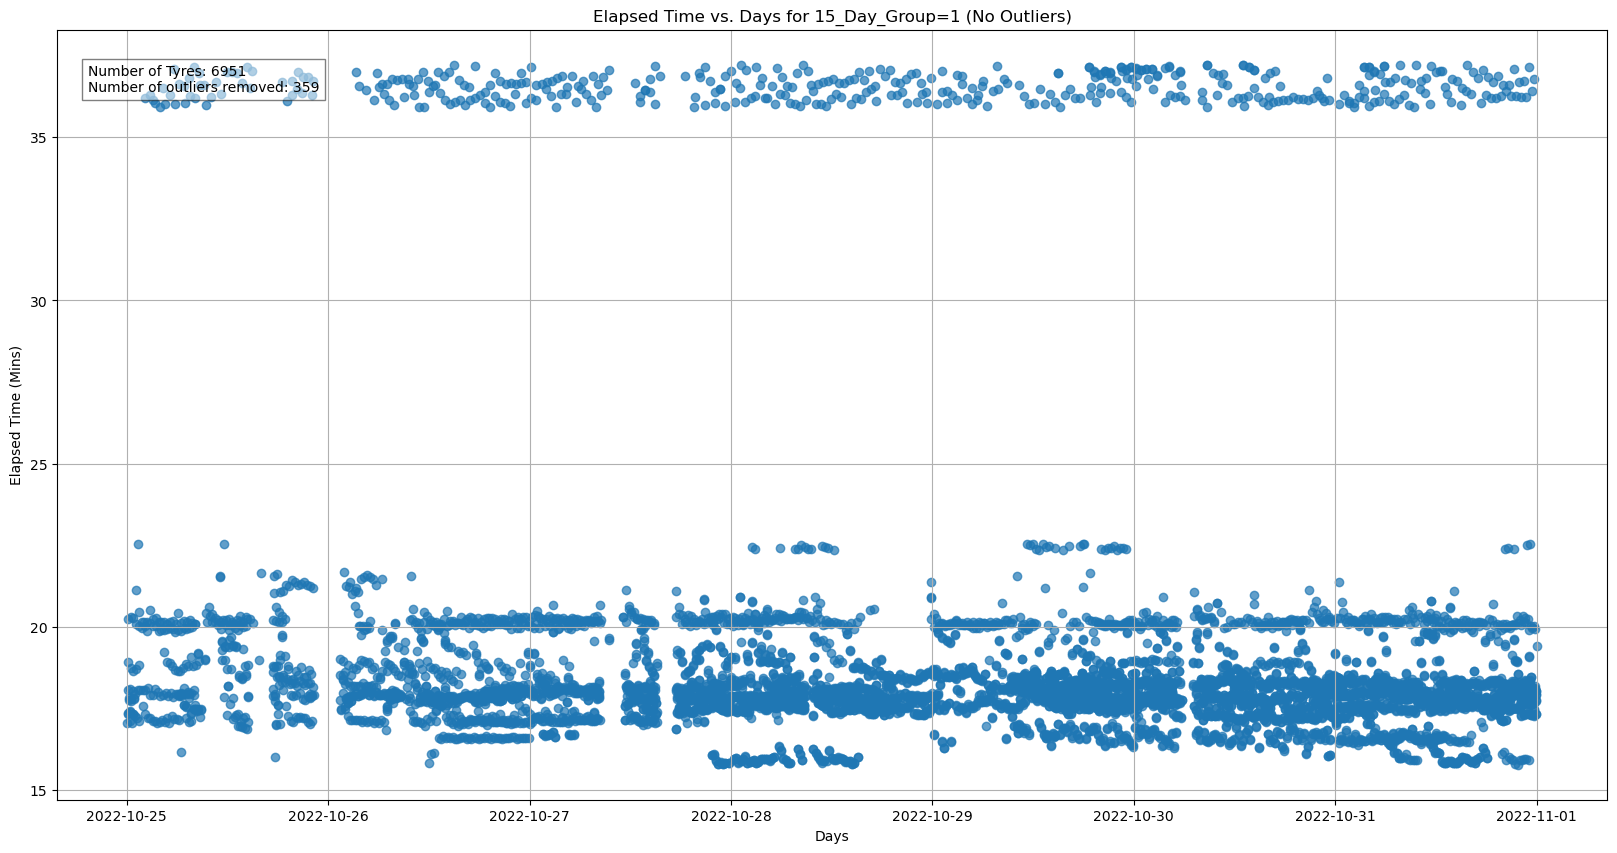

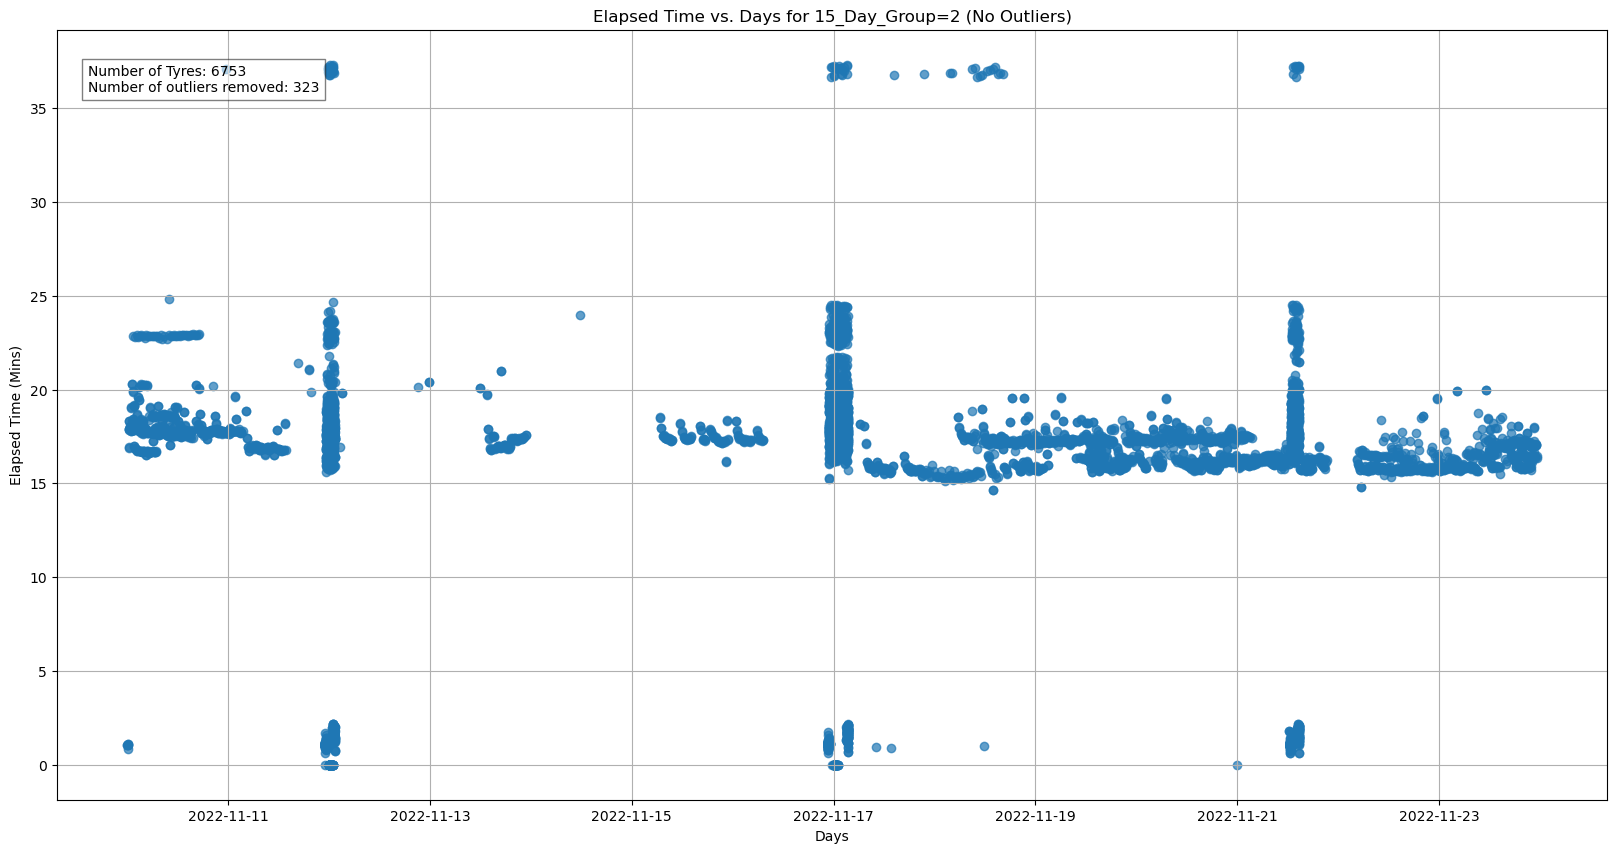

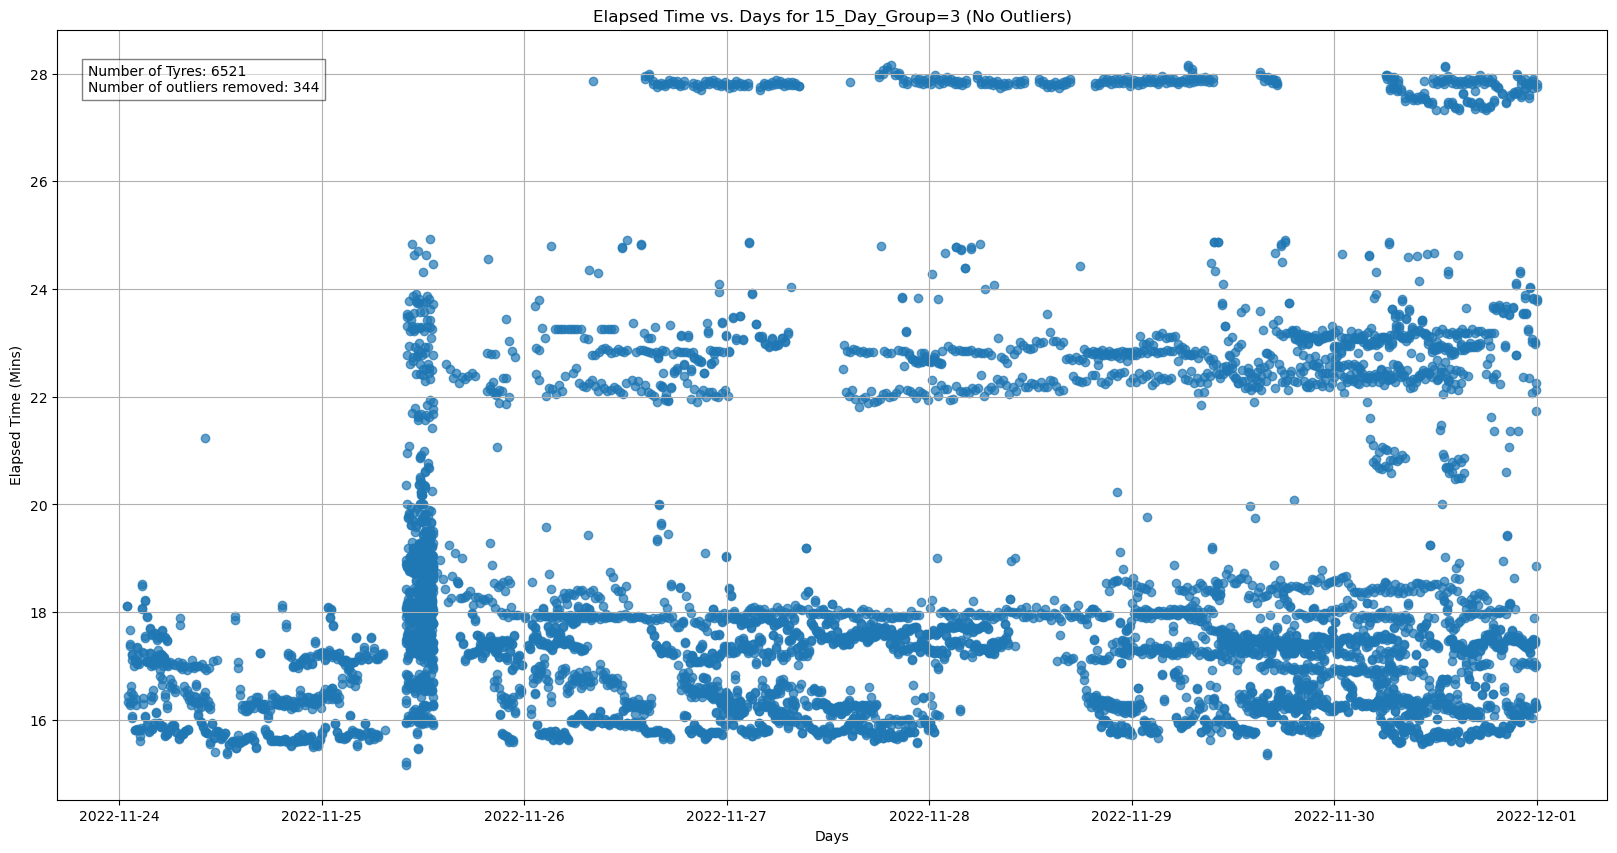

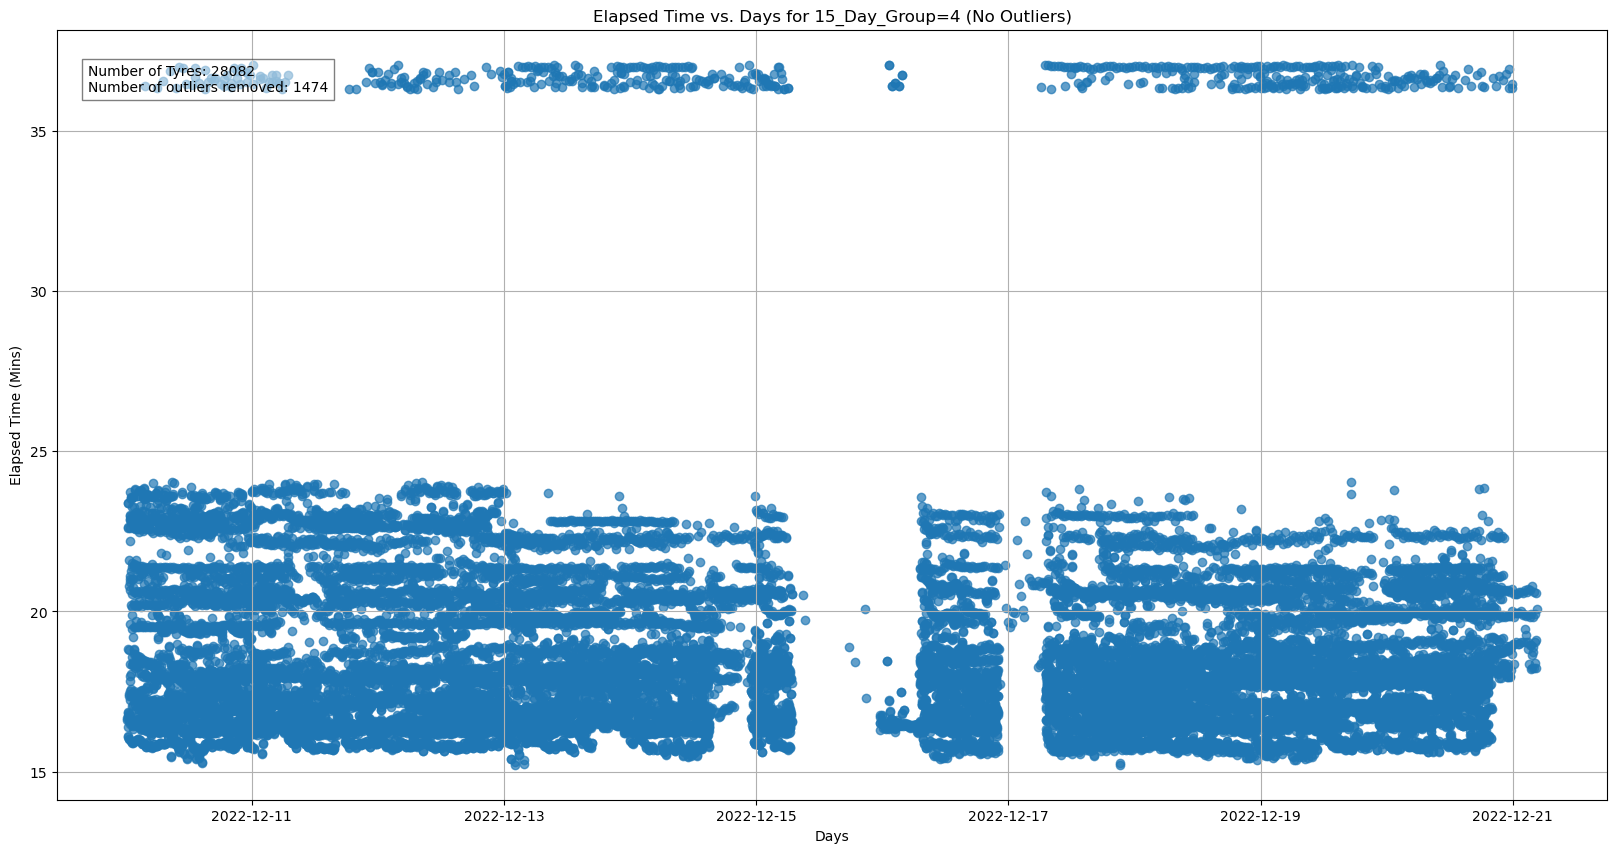

Total number of outliers removed: 2907


In [160]:
# Initialize a variable to store the total number of outliers removed
total_outliers_removed = 0

# Plotting for each 15-day group separately
for group_name, group_data in result_df.groupby('15_day_group'):
    # Extract the features for Isolation Forest
    X = group_data[['elapsed_time_min']]
    
    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=0.05, random_state=42)  # You may need to adjust the contamination parameter
    group_data['is_outlier'] = clf.fit_predict(X)
    
    # Identify outliers for the current group
    outliers = group_data[group_data['is_outlier'] == -1]
    
    # Increment the total number of outliers removed
    total_outliers_removed += len(outliers)
    
    # Create a new DataFrame without outliers
    group_data_no_outliers = group_data[group_data['is_outlier'] != -1]
    
    plt.figure(figsize=(20, 10))
    
    # Plotting
    plt.scatter(group_data_no_outliers['y-m-d-hour'], group_data_no_outliers['elapsed_time_min'], alpha=0.7)
    
    # Title and labels
    plt.title(f'Elapsed Time vs. Days for 15_Day_Group={group_name} (No Outliers)')
    plt.xlabel('Days')
    plt.ylabel('Elapsed Time (Mins)')
    plt.grid(True)
    
    # Display the number of points and outliers removed in the current plot
    num_points = len(group_data_no_outliers)
    num_outliers = len(outliers)
    plt.text(0.02, 0.92, f'Number of Tyres: {num_points}\nNumber of outliers removed: {num_outliers}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    
    plt.show()

# Display the total number of outliers removed across all groups
print(f'Total number of outliers removed: {total_outliers_removed}')


# Plot for one IPCode: 38820

15-day Group: 2, Machine C404:
  Number of Tyres: 320
  Number of outliers removed: 6
15-day Group: 2, Machine C503:
  Number of Tyres: 802
  Number of outliers removed: 17


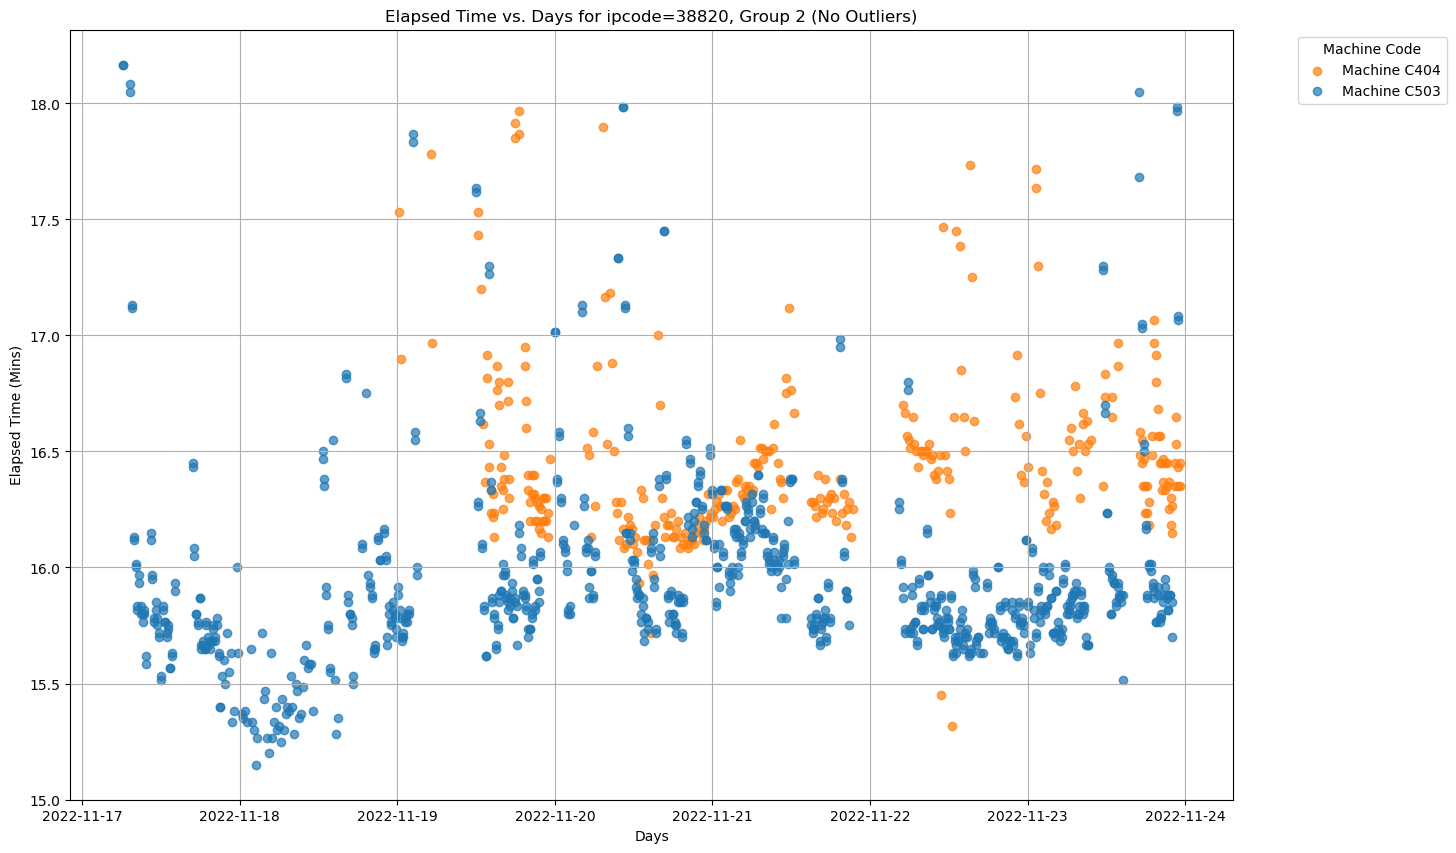

15-day Group: 3, Machine C404:
  Number of Tyres: 699
  Number of outliers removed: 17
15-day Group: 3, Machine C503:
  Number of Tyres: 870
  Number of outliers removed: 16


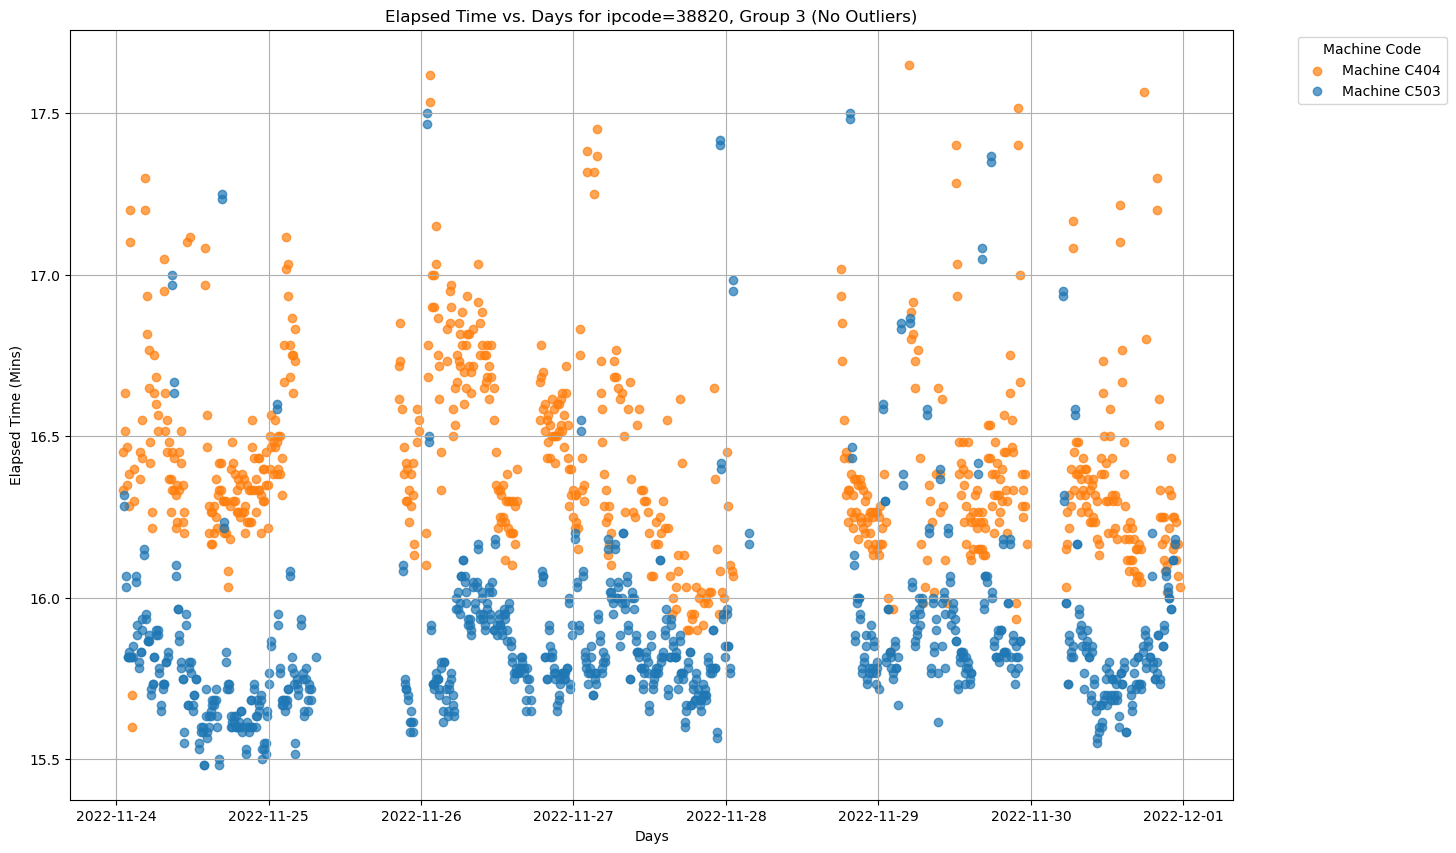

15-day Group: 4, Machine C104:
  Number of Tyres: 1388
  Number of outliers removed: 21
15-day Group: 4, Machine C404:
  Number of Tyres: 1338
  Number of outliers removed: 34
15-day Group: 4, Machine C503:
  Number of Tyres: 1391
  Number of outliers removed: 30


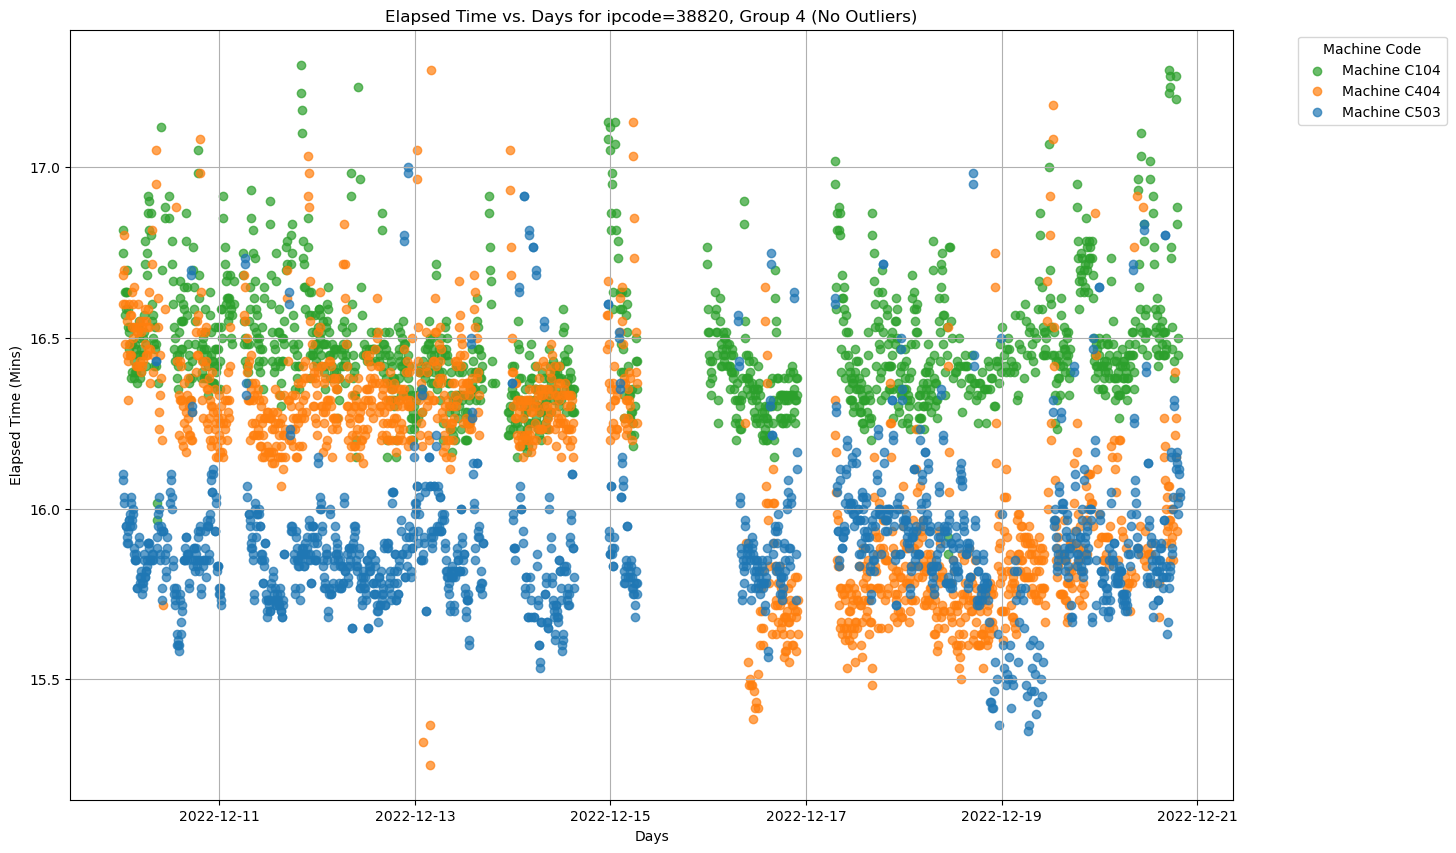

Total number of outliers removed for ipcode=38820: 141


In [161]:
Contamination = 0.02
YOUR_IPCODE = 38820



# Specify the desired 'ddc_ipcode'
selected_ipcode = YOUR_IPCODE

# Filter the DataFrame for the selected 'ddc_ipcode'
result_df_selected_ipcode = result_df[result_df['ddc_ipcode'] == selected_ipcode]

# Initialize a variable to store the total number of outliers removed
total_outliers_removed = 0

# Create a color map for different machines
color_map = {machine_code: f'C{i}' for i, machine_code in enumerate(result_df_selected_ipcode['ddc_mch_code'].unique())}

# Plotting for each 15-day group separately
for group_name, group_data in result_df_selected_ipcode.groupby('15_day_group'):
    # Extract the features for Isolation Forest
    X = group_data[['elapsed_time_min']]
    
    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=Contamination, random_state=42)  # You may need to adjust the contamination parameter
    group_data['is_outlier'] = clf.fit_predict(X)
    
    # Identify outliers for the current group
    outliers = group_data[group_data['is_outlier'] == -1]
    
    # Increment the total number of outliers removed
    total_outliers_removed += len(outliers)
    
    # Create a new DataFrame without outliers
    group_data_no_outliers = group_data[group_data['is_outlier'] != -1]
    
    # Plotting for each machine separately
    plt.figure(figsize=(15, 10))
    for machine_code, machine_group in group_data_no_outliers.groupby('ddc_mch_code'):
        plt.scatter(machine_group['y-m-d-hour'], machine_group['elapsed_time_min'],
                    label=f'Machine {machine_code}', alpha=0.7, c=color_map[machine_code])
    
    # Title and labels
    plt.title(f'Elapsed Time vs. Days for ipcode={selected_ipcode}, Group {group_name} (No Outliers)')
    plt.xlabel('Days')
    plt.ylabel('Elapsed Time (Mins)')
    plt.grid(True)
    
    # Display the number of points and outliers for each machine in the current group
    for machine_code, machine_group in group_data_no_outliers.groupby('ddc_mch_code'):
        num_points = len(machine_group)
        num_outliers = len(outliers[outliers['ddc_mch_code'] == machine_code])
        print(f'15-day Group: {group_name}, Machine {machine_code}:')
        print(f'  Number of Tyres: {num_points}')
        print(f'  Number of outliers removed: {num_outliers}')
    
    plt.legend(title='Machine Code', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Display the total number of outliers removed for the selected 'ddc_ipcode'
print(f'Total number of outliers removed for ipcode={selected_ipcode}: {total_outliers_removed}')


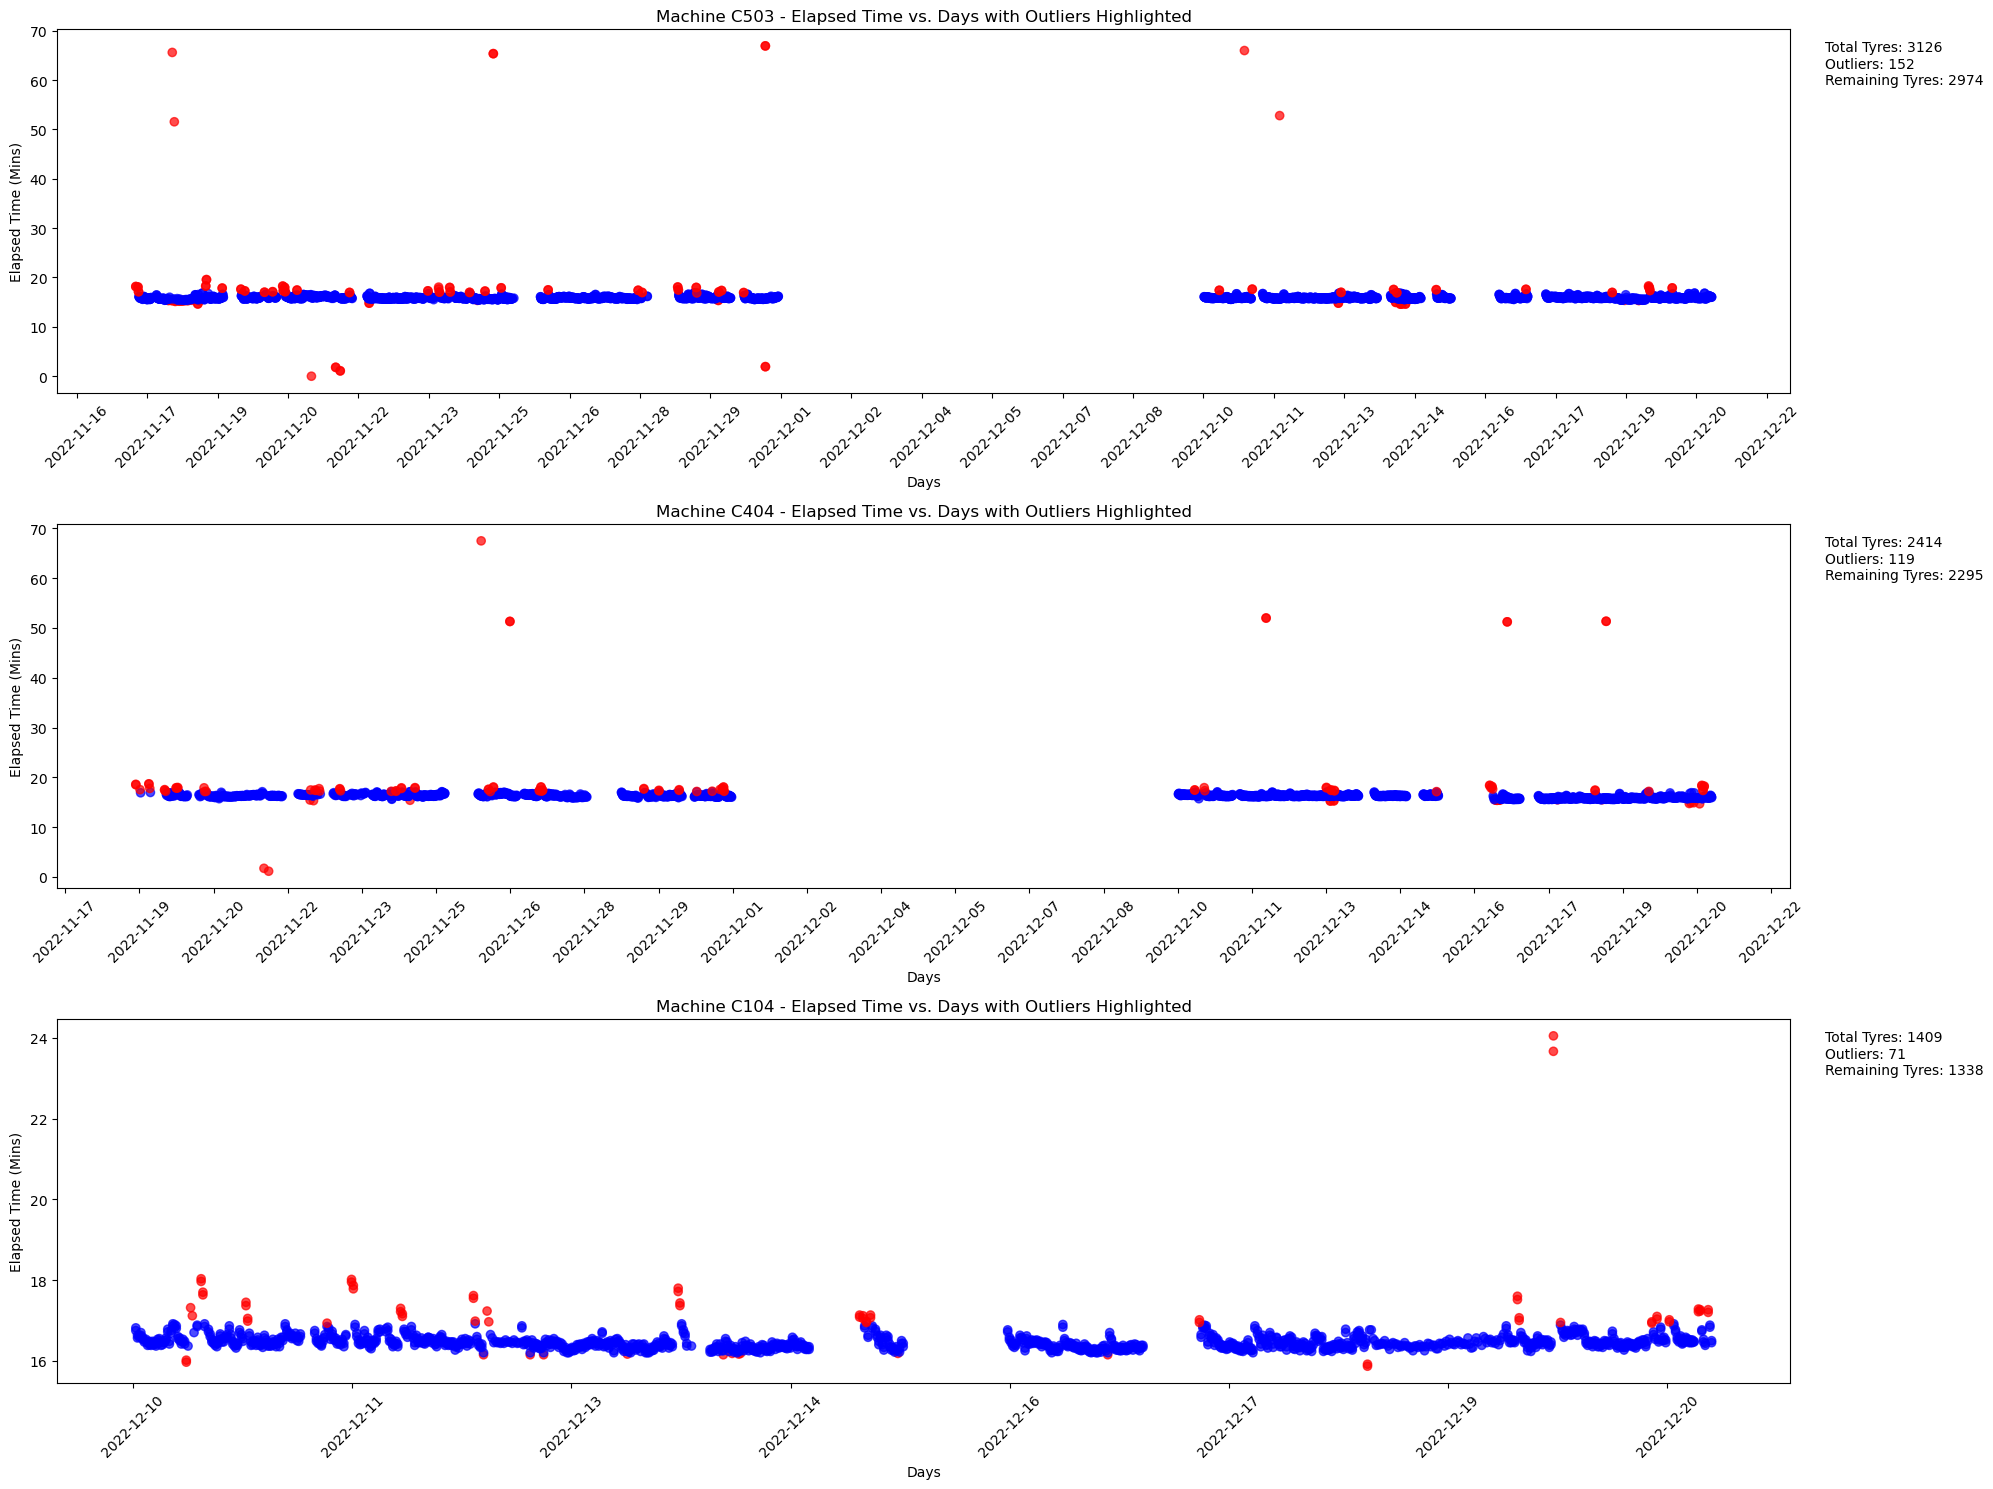

Machine C503: Total Tyres - 3126, Total outliers - 152
Machine C404: Total Tyres - 2414, Total outliers - 119
Machine C104: Total Tyres - 1409, Total outliers - 71


In [162]:
# Filter the DataFrame for the selected 'ddc_ipcode'
result_df_selected_ipcode = result_df[result_df['ddc_ipcode'] == selected_ipcode]

# Initialize a color map for different machines
color_map = {machine_code: f'C{i}' for i, machine_code in enumerate(result_df_selected_ipcode['ddc_mch_code'].unique())}

# Initialize dictionaries to store the total number of outliers and remaining points for each machine
total_outliers_dict = {machine_code: 0 for machine_code in color_map.keys()}
total_points_dict = {machine_code: 0 for machine_code in color_map.keys()}

# Create subplots for each machine
fig, axes = plt.subplots(nrows=len(color_map), figsize=(20, 5 * len(color_map)))
for i, (machine_code, color) in enumerate(color_map.items()):
    # Filter data for the current machine
    machine_data = result_df_selected_ipcode[result_df_selected_ipcode['ddc_mch_code'] == machine_code]

    # Identify outliers using Isolation Forest
    X = machine_data[['elapsed_time_min']]
    clf = IsolationForest(contamination=0.05, random_state=42)  # You may need to adjust the contamination parameter
    machine_data['is_outlier'] = clf.fit_predict(X)

    # Increment the total number of outliers and total points for the current machine
    total_outliers_dict[machine_code] += np.sum(machine_data['is_outlier'] == -1)
    total_points_dict[machine_code] += len(machine_data)

    # Plotting Elapsed Time vs. y-m-d-hour with outliers highlighted
    axes[i].scatter(
        machine_data['y-m-d-hour'],
        machine_data['elapsed_time_min'],
        c=np.where(machine_data['is_outlier'] == -1, 'red', 'blue'),  # Highlight outliers in red
        alpha=0.7,
    )

    # Title and labels for the plot
    axes[i].set_title(f'Machine {machine_code} - Elapsed Time vs. Days with Outliers Highlighted')
    axes[i].set_xlabel('Days')
    axes[i].set_ylabel('Elapsed Time (Mins)')

    # Display information about total points, outliers, and remaining points
    num_points_total = len(machine_data)
    num_outliers = np.sum(machine_data['is_outlier'] == -1)
    num_remaining_points = num_points_total - num_outliers
    axes[i].text(
        1.02,
        0.85,
        f'Total Tyres: {num_points_total}\nOutliers: {num_outliers}\nRemaining Tyres: {num_remaining_points}',
        transform=axes[i].transAxes,
    )

    # Rotate x-axis day labels vertically and show all dates
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(nbins=len(machine_data['y-m-d-hour'].dt.date.unique())))

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display the total number of outliers and total points for each machine
for machine_code in total_outliers_dict.keys():
    total_outliers = total_outliers_dict[machine_code]
    total_points = total_points_dict[machine_code]
    print(f'Machine {machine_code}: Total Tyres - {total_points}, Total outliers - {total_outliers}')


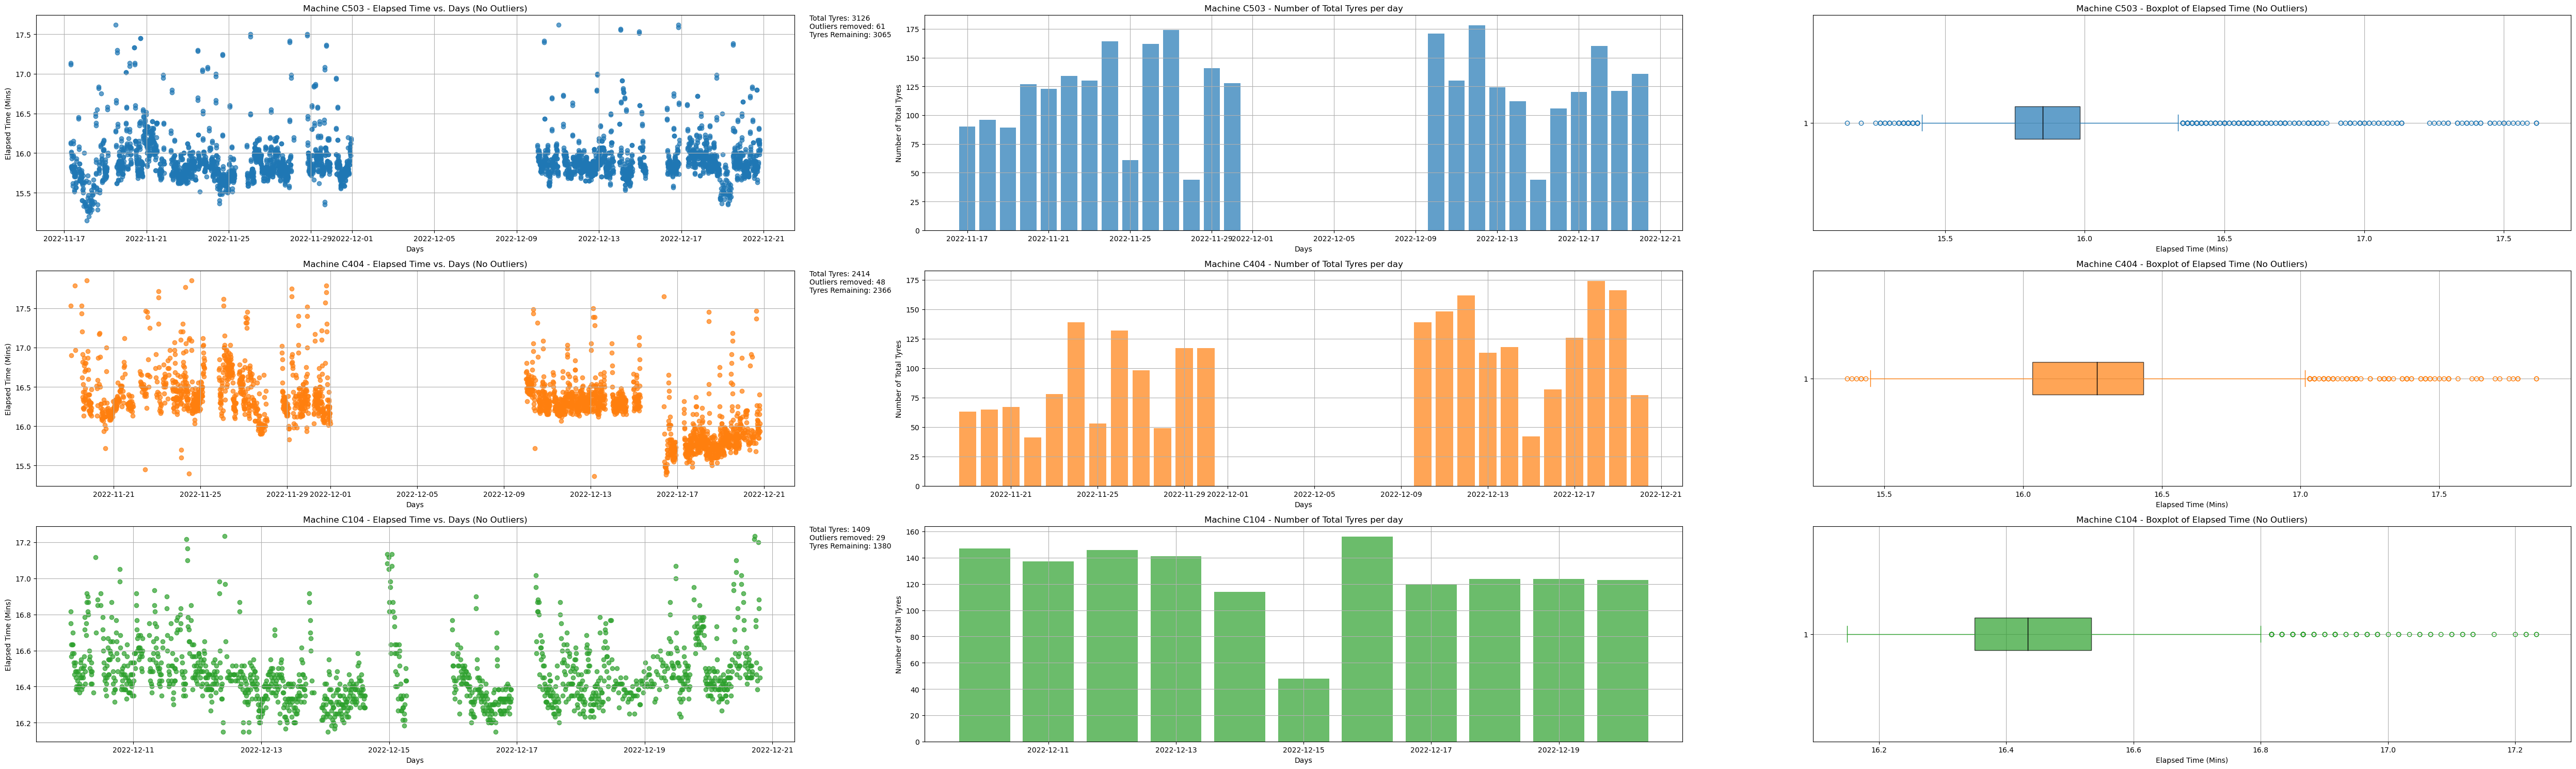

Machine C503: Total Tyres - 3065
Machine C404: Total Tyres - 2366
Machine C104: Total Tyres - 1380
Total number of outliers removed: 138


In [176]:
# Filter the DataFrame for the selected 'ddc_ipcode'
result_df_selected_ipcode = result_df[result_df['ddc_ipcode'] == selected_ipcode]


# Initialize a variable to store the total number of outliers removed
total_outliers_removed = 0

# Create a color map for different machines
color_map = {machine_code: f'C{i}' for i, machine_code in enumerate(result_df_selected_ipcode['ddc_mch_code'].unique())}

# Initialize a dictionary to store the total number of points for each machine
total_points_dict = {machine_code: 0 for machine_code in color_map.keys()}

# Create subplots for each machine
fig, axes = plt.subplots(nrows=len(color_map), ncols=3, figsize=(50, 5 * len(color_map)))
for i, (machine_code, color) in enumerate(zip(color_map.keys(), color_map.values())):
    # Filter data for the current machine
    machine_data = result_df_selected_ipcode[result_df_selected_ipcode['ddc_mch_code'] == machine_code]

    # Extract the features for Isolation Forest
    X = machine_data[['elapsed_time_min']]

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=Contamination, random_state=42)  # You may need to adjust the contamination parameter
    machine_data['is_outlier'] = clf.fit_predict(X)

    # Identify outliers for the current machine
    outliers = machine_data[machine_data['is_outlier'] == -1]

    # Increment the total number of outliers removed
    total_outliers_removed += len(outliers)

    # Create a new DataFrame without outliers
    machine_data_no_outliers = machine_data[machine_data['is_outlier'] != -1]

    # Plotting Elapsed Time vs. y-m-d-hour
    axes[i, 0].scatter(
        machine_data_no_outliers['y-m-d-hour'],
        machine_data_no_outliers['elapsed_time_min'],
        c=color,
        alpha=0.7,
    )

    # Title and labels for the first plot
    axes[i, 0].set_title(f'Machine {machine_code} - Elapsed Time vs. Days (No Outliers)')
    axes[i, 0].set_xlabel('Days')
    axes[i, 0].set_ylabel('Elapsed Time (Mins)')
    axes[i, 0].grid(True)

    # Display the total number of points and outliers for the current machine
    num_points_total = len(machine_data)
    num_outliers = len(outliers)
    num_remaining_points = len(machine_data_no_outliers)
    axes[i, 0].text(
        1.02,
        0.9,
        f'Total Tyres: {num_points_total}\nOutliers removed: {num_outliers}\nTyres Remaining: {num_remaining_points}',
        transform=axes[i, 0].transAxes,
    )

    # Increment the total number of points for the current machine
    total_points_dict[machine_code] += num_remaining_points

    # Plotting Number of Total Points per day
    axes[i, 1].bar(
        machine_data_no_outliers.groupby(machine_data_no_outliers['y-m-d-hour'].dt.date).size().index,
        machine_data_no_outliers.groupby(machine_data_no_outliers['y-m-d-hour'].dt.date).size().values,
        color=color,
        alpha=0.7,
    )

    # Title and labels for the second plot
    axes[i, 1].set_title(f'Machine {machine_code} - Number of Total Tyres per day')
    axes[i, 1].set_xlabel('Days')
    axes[i, 1].set_ylabel('Number of Total Tyres')
    axes[i, 1].grid(True)

    # Plotting Boxplot of Elapsed Time
    axes[i, 2].boxplot(
        machine_data_no_outliers['elapsed_time_min'],
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor=color, alpha=0.7),
        capprops=dict(color=color),
        whiskerprops=dict(color=color),
        flierprops=dict(color=color, markeredgecolor=color),
        medianprops=dict(color='black')
    )

    # Title and labels for the third plot
    axes[i, 2].set_title(f'Machine {machine_code} - Boxplot of Elapsed Time (No Outliers)')
    axes[i, 2].set_xlabel('Elapsed Time (Mins)')
    axes[i, 2].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display the total number of points for each machine outside the plot areas
for machine_code, total_points in total_points_dict.items():
    print(f'Machine {machine_code}: Total Tyres - {total_points}')

# Display the total number of outliers removed
print(f'Total number of outliers removed: {total_outliers_removed}')


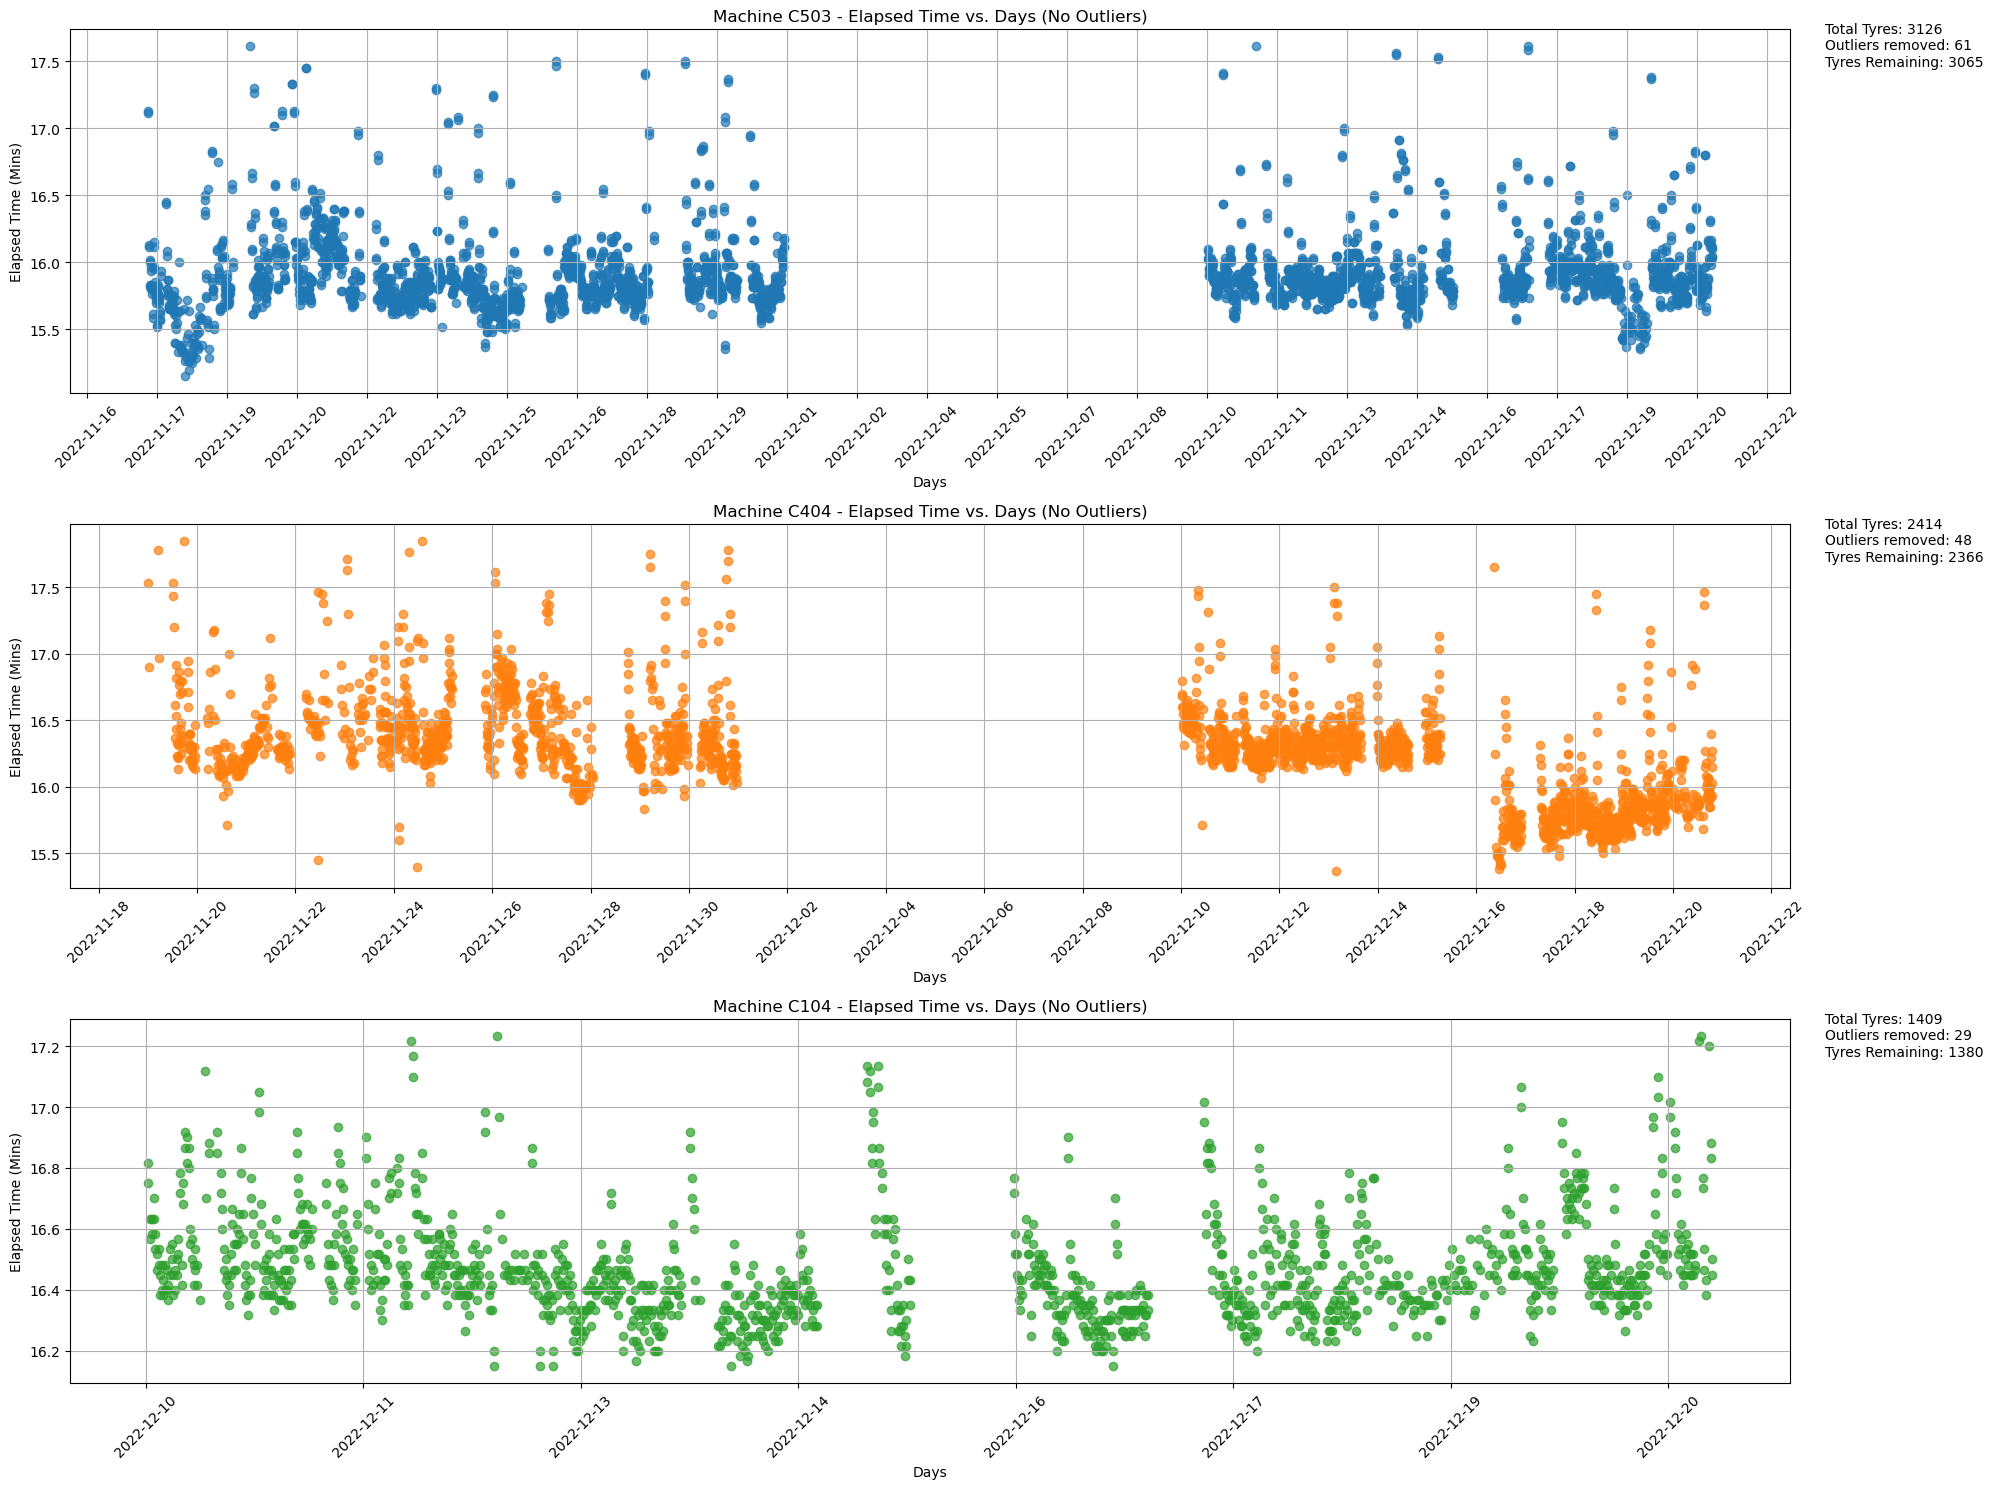

Machine C503: Total Tyres - 3065
Machine C404: Total Tyres - 2366
Machine C104: Total Tyres - 1380
Total number of outliers removed: 138


In [175]:
# Filter the DataFrame for the selected 'ddc_ipcode'
result_df_selected_ipcode = result_df[result_df['ddc_ipcode'] == selected_ipcode]

# Initialize a variable to store the total number of outliers removed
total_outliers_removed = 0

# Create a color map for different machines
color_map = {machine_code: f'C{i}' for i, machine_code in enumerate(result_df_selected_ipcode['ddc_mch_code'].unique())}

# Initialize a dictionary to store the total number of points for each machine
total_points_dict = {machine_code: 0 for machine_code in color_map.keys()}

# Create subplots for each machine
fig, axes = plt.subplots(nrows=len(color_map), figsize=(20, 5 * len(color_map)))
for i, (machine_code, color) in enumerate(zip(color_map.keys(), color_map.values())):
    # Filter data for the current machine
    machine_data = result_df_selected_ipcode[result_df_selected_ipcode['ddc_mch_code'] == machine_code]

    # Extract the features for Isolation Forest
    X = machine_data[['elapsed_time_min']]

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=Contamination, random_state=42)  # You may need to adjust the contamination parameter
    machine_data['is_outlier'] = clf.fit_predict(X)

    # Identify outliers for the current machine
    outliers = machine_data[machine_data['is_outlier'] == -1]

    # Increment the total number of outliers removed
    total_outliers_removed += len(outliers)

    # Create a new DataFrame without outliers
    machine_data_no_outliers = machine_data[machine_data['is_outlier'] != -1]

    # Plotting
    axes[i].scatter(
        machine_data_no_outliers['y-m-d-hour'],
        machine_data_no_outliers['elapsed_time_min'],
        c=color,
        alpha=0.7,
    )

    # Title and labels
    axes[i].set_title(f'Machine {machine_code} - Elapsed Time vs. Days (No Outliers)')
    axes[i].set_xlabel('Days')
    axes[i].set_ylabel('Elapsed Time (Mins)')
    axes[i].grid(True)

    # Display the total number of points and outliers for the current machine
    num_points_total = len(machine_data)
    num_outliers = len(outliers)
    num_remaining_points = len(machine_data_no_outliers)
    axes[i].text(
        1.02,
        0.9,
        f'Total Tyres: {num_points_total}\nOutliers removed: {num_outliers}\nTyres Remaining: {num_remaining_points}',
        transform=axes[i].transAxes,
    )

    # Increment the total number of points for the current machine
    total_points_dict[machine_code] += num_remaining_points

    # Rotate y-axis labels
    axes[i].tick_params(axis='x', rotation=45)

    # Adjust x-axis ticks to show all days
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(len(machine_data_no_outliers['y-m-d-hour'].dt.date.unique())))

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display the total number of points for each machine outside the plot areas
for machine_code, total_points in total_points_dict.items():
    print(f'Machine {machine_code}: Total Tyres - {total_points}')
    
# Display the total number of outliers removed
print(f'Total number of outliers removed: {total_outliers_removed}')


# Spli the Plot according to the Left and Right side of machine

Machine C503: Total left side - 1480, Total right side - 1585
Machine C404: Total left side - 1105, Total right side - 1261
Machine C104: Total left side - 739, Total right side - 641


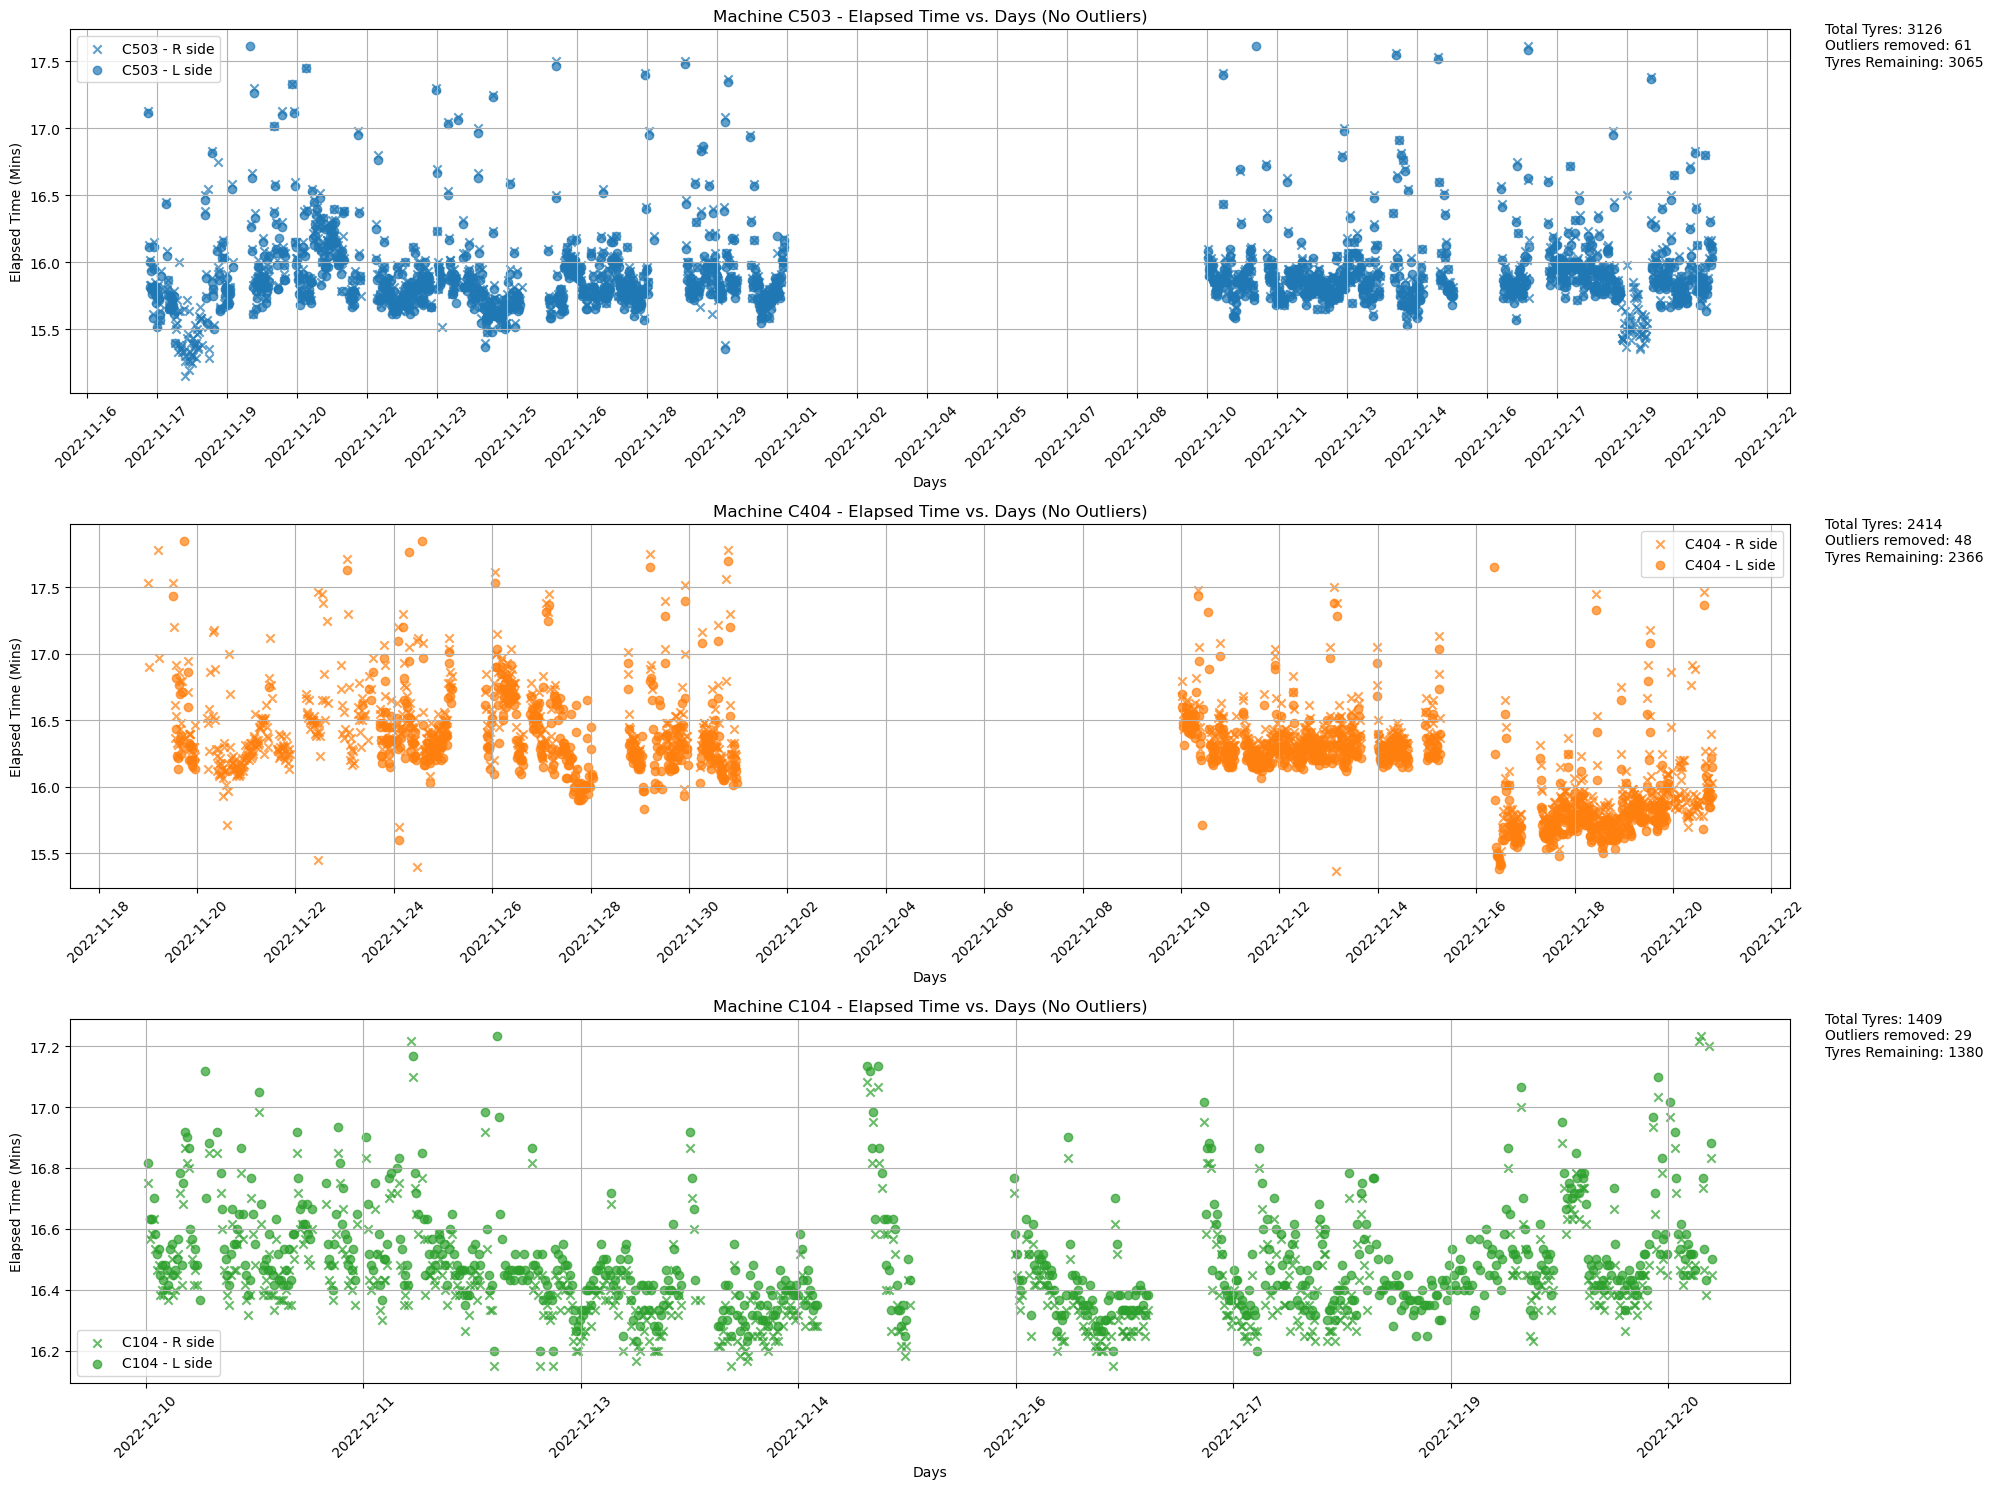

Machine C503: Total Tyres - 3065
Machine C404: Total Tyres - 2366
Machine C104: Total Tyres - 1380
Total number of outliers removed: 138


In [177]:
# Filter the DataFrame for the selected 'ddc_ipcode'
result_df_selected_ipcode = result_df[result_df['ddc_ipcode'] == selected_ipcode]

# Initialize a variable to store the total number of outliers removed
total_outliers_removed = 0

# Create a color map for different machines
color_map = {machine_code: f'C{i}' for i, machine_code in enumerate(result_df_selected_ipcode['ddc_mch_code'].unique())}

# Initialize a dictionary to store the total number of points for each machine
total_points_dict = {machine_code: 0 for machine_code in color_map.keys()}

# Initialize dictionaries to store the counts of left and right sides for each machine
left_side_count_dict = {machine_code: 0 for machine_code in color_map.keys()}
right_side_count_dict = {machine_code: 0 for machine_code in color_map.keys()}

# Create subplots for each machine
fig, axes = plt.subplots(nrows=len(color_map), figsize=(20, 5 * len(color_map)))
for i, (machine_code, color) in enumerate(zip(color_map.keys(), color_map.values())):
    # Filter data for the current machine
    machine_data = result_df_selected_ipcode[result_df_selected_ipcode['ddc_mch_code'] == machine_code]

    # Extract the features for Isolation Forest
    X = machine_data[['elapsed_time_min']]

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=Contamination, random_state=42)  # You may need to adjust the contamination parameter
    machine_data['is_outlier'] = clf.fit_predict(X)

    # Identify outliers for the current machine
    outliers = machine_data[machine_data['is_outlier'] == -1]

    # Increment the total number of outliers removed
    total_outliers_removed += len(outliers)

    # Create a new DataFrame without outliers
    machine_data_no_outliers = machine_data[machine_data['is_outlier'] != -1]

    # Count the number of left and right sides
    left_side_count = machine_data_no_outliers[machine_data_no_outliers['ddc_mch_side'] == 'L'].shape[0]
    right_side_count = machine_data_no_outliers[machine_data_no_outliers['ddc_mch_side'] == 'R'].shape[0]

    # Update the counts in the dictionaries
    left_side_count_dict[machine_code] = left_side_count
    right_side_count_dict[machine_code] = right_side_count

    # Plotting with differentiation based on ddc_mch_side
    for side in machine_data_no_outliers['ddc_mch_side'].unique():
        side_data = machine_data_no_outliers[machine_data_no_outliers['ddc_mch_side'] == side]
        axes[i].scatter(
            side_data['y-m-d-hour'],
            side_data['elapsed_time_min'],
            label=f'{machine_code} - {side} side',
            alpha=0.7,
            marker='o' if side == 'L' else 'x',  # Use 'o' for left side and 'x' for right side
            color=color,
        )

    # Title and labels
    axes[i].set_title(f'Machine {machine_code} - Elapsed Time vs. Days (No Outliers)')
    axes[i].set_xlabel('Days')
    axes[i].set_ylabel('Elapsed Time (Mins)')
    axes[i].grid(True)
    axes[i].legend()

    # Display the total number of points and outliers for the current machine
    num_points_total = len(machine_data)
    num_outliers = len(outliers)
    num_remaining_points = len(machine_data_no_outliers)
    axes[i].text(
        1.02,
        0.9,
        f'Total Tyres: {num_points_total}\nOutliers removed: {num_outliers}\nTyres Remaining: {num_remaining_points}',
        transform=axes[i].transAxes,
    )

    # Increment the total number of points for the current machine
    total_points_dict[machine_code] += num_remaining_points

    # Rotate y-axis labels
    axes[i].tick_params(axis='x', rotation=45)

    # Adjust x-axis ticks to show all days
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(len(machine_data_no_outliers['y-m-d-hour'].dt.date.unique())))

# Display the total number of left and right tires for each machine
for machine_code in color_map.keys():
    total_left = left_side_count_dict[machine_code]
    total_right = right_side_count_dict[machine_code]
    print(f'Machine {machine_code}: Total left side - {total_left}, Total right side - {total_right}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display the total number of points for each machine outside the plot areas
for machine_code, total_points in total_points_dict.items():
    print(f'Machine {machine_code}: Total Tyres - {total_points}')

# Display the total number of outliers removed
print(f'Total number of outliers removed: {total_outliers_removed}')


# Plot for one IP code: 38820 and one machine: C404 according to the Left and Right side of machine

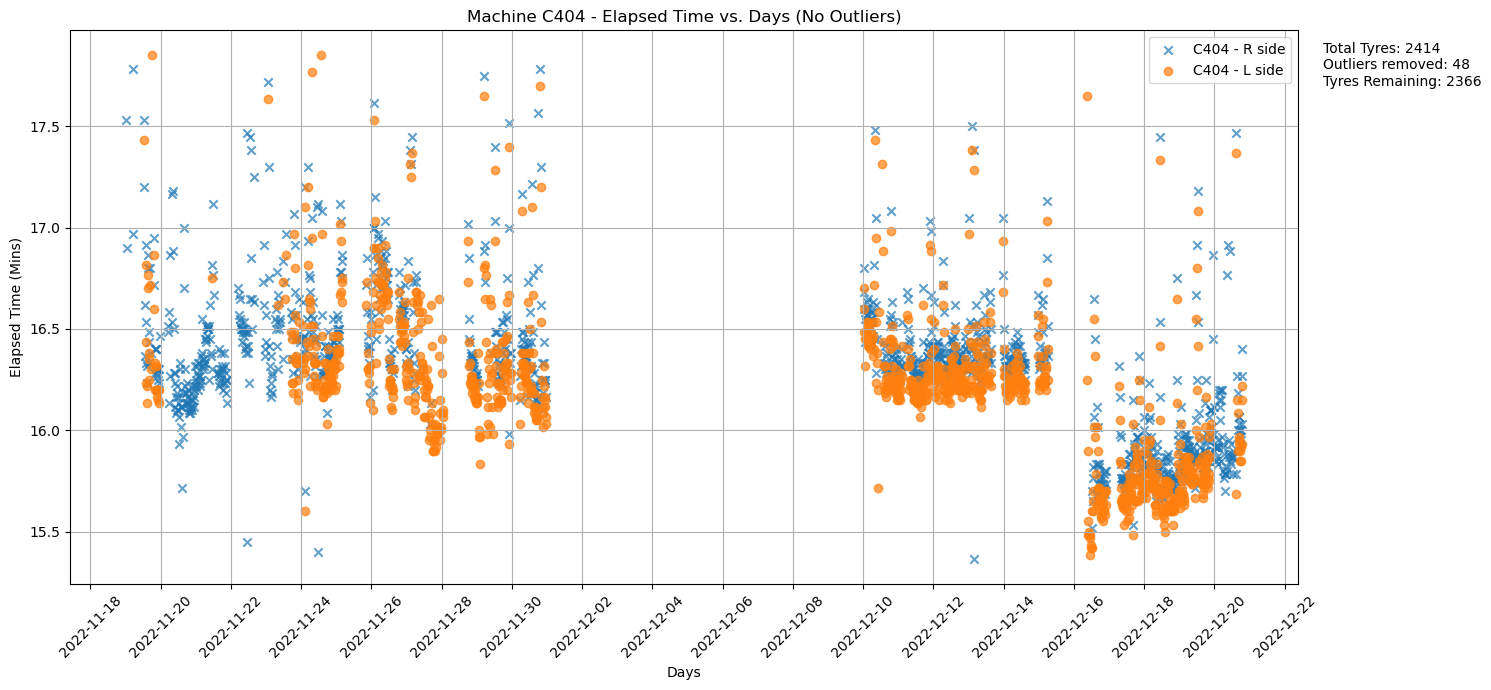

Machine C404: Total left side - 1105, Total right side - 1261


In [178]:
# Specify the machine code you want to analyze
selected_machine_code = 'C404'

# Filter the DataFrame for the selected 'ddc_ipcode' and 'ddc_mch_code'
result_df_selected_ipcode = result_df[(result_df['ddc_ipcode'] == selected_ipcode) & (result_df['ddc_mch_code'] == selected_machine_code)]

# Extract the features for Isolation Forest
X = result_df_selected_ipcode[['elapsed_time_min']]

# Fit the Isolation Forest model
clf = IsolationForest(contamination=Contamination, random_state=42)  # You may need to adjust the contamination parameter
result_df_selected_ipcode['is_outlier'] = clf.fit_predict(X)

# Identify outliers for the selected machine
outliers = result_df_selected_ipcode[result_df_selected_ipcode['is_outlier'] == -1]

# Increment the total number of outliers removed
total_outliers_removed = len(outliers)

# Create a new DataFrame without outliers
result_df_no_outliers = result_df_selected_ipcode[result_df_selected_ipcode['is_outlier'] != -1]

# Count the number of left and right sides
total_left = result_df_no_outliers[result_df_no_outliers['ddc_mch_side'] == 'L'].shape[0]
total_right = result_df_no_outliers[result_df_no_outliers['ddc_mch_side'] == 'R'].shape[0]

# Plotting with differentiation based on ddc_mch_side
fig, ax = plt.subplots(figsize=(15, 7))
for side in result_df_no_outliers['ddc_mch_side'].unique():
    side_data = result_df_no_outliers[result_df_no_outliers['ddc_mch_side'] == side]
    ax.scatter(
        side_data['y-m-d-hour'],
        side_data['elapsed_time_min'],
        label=f'{selected_machine_code} - {side} side',
        alpha=0.7,
        marker='o' if side == 'L' else 'x',  # Use 'o' for left side and 'x' for right side
    )

# Title and labels
ax.set_title(f'Machine {selected_machine_code} - Elapsed Time vs. Days (No Outliers)')
ax.set_xlabel('Days')
ax.set_ylabel('Elapsed Time (Mins)')
ax.grid(True)
ax.legend()

# Display the total number of points and outliers for the selected machine
num_points_total = len(result_df_selected_ipcode)
num_remaining_points = len(result_df_no_outliers)
ax.text(
    1.02,
    0.9,
    f'Total Tyres: {num_points_total}\nOutliers removed: {total_outliers_removed}\nTyres Remaining: {num_remaining_points}',
    transform=ax.transAxes,
)

# Rotate y-axis labels
ax.tick_params(axis='x', rotation=45)

# Adjust x-axis ticks to show all days
ax.xaxis.set_major_locator(plt.MaxNLocator(len(result_df_no_outliers['y-m-d-hour'].dt.date.unique())))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Display the total number of left and right tires for the selected machine
print(f'Machine {selected_machine_code}: Total left side - {total_left}, Total right side - {total_right}')
